# Name data: `common_Dstto3pi_BDT{cut_BDT}`

# Compute the sWeights 
For a given cut on the `BDT` value, with the starting value of the fit chosen as the result of the previous fit, specified by `cut_BDT_ref`, manually chosen to be `cut_BDT - 0.05`.
1. Fit on $m(3\pi)$ for $|m(3\pi) - 1968|<50$
    - Signal shape: Gaussian
    - Background shape: Exponential
2. Compute the associated probability and sWeights, save the sWeights in a Pickle file.
3. Plot some interesting things for checking
4. Save the full dataframe in a root file. It will be the input of `fit_all_data_V8_2_files_BDTs_recomputed_sWeights.ipynb`.

Thanks to the fit, we get
- $f_g(m)$, the signal Ds PDF
- $f_e(m)$, the background Ds PDF
Besides, our dataset is given by a list of events, each event is characterised by $m_{3\pi})$

We define the probability of the event $e$ being a $D_s$ by:
$$P\left(e = D_s\right)=\frac{f_g(m_{e, 3\pi})}{\sum_{event\ k}{\left(f_g(m_{k,3\pi})+f_e(m_{k, 3\pi})\right)}}$$

From this probabily, the sWeights can be computed.

The saved root file is already cut on the `BDT` output, and has a new column `sWeight`. The root files are saved in `output/root/common/`

In [ ]:
import zfit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from hep_ml import splot
import timeit
from scipy.stats import pearsonr

from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets

import sys
sys.path.append(loc.SCRIPTS)
from load_save_data import load_saved_root, save_dataframe, add_constr_Dst, json_to_latex_table, retrieve_params, format_previous_params
from plot.tool import fix_plot
import plot.histogram as h
from plot.fit import plot_hist_fit_particle
from fit import launch_fit, define_zparams, save_params
from variables import name_params_tau

In [ ]:
name_data = 'common_Dstto3pi'
name_BDT = 'gradient_bkgHighB0M'

## INIT

### Retrieve data

In [ ]:
# load_data does the cut on DeltaM and tau_M (around m(Ds)).
df_common_Ds = load_saved_root('common_'+name_BDT, name_folder='common', vars=['B0_M', 'tau_M', 'Dst_M', 'BDT'])
df_common_Ds = add_constr_Dst(df_common_Ds)

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT_data


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='BDT', ylabel='Candidates / (0.2)'>)

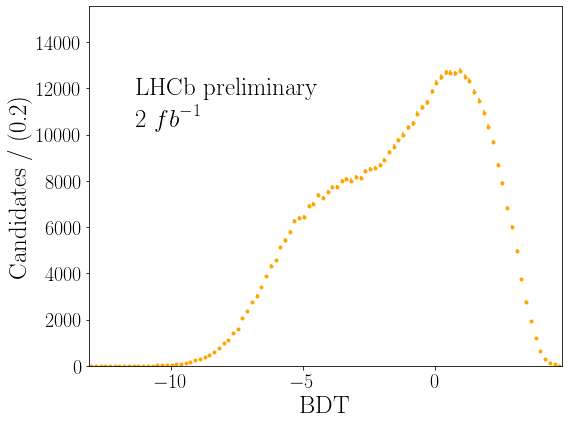

In [8]:
h.plot_hist_particle({'data': df_common_Ds},'BDT',
              n_bins = 100, mode_hist = False, colors=['orange', 'cyan'], pos_text_LHC=[0.1,0.8,'left'])

### BDT cuts

Reference fit whose results are taken as the starting values of the new fit.
It is specified by `cut_BDT_ref`, the cut on the `BDT` output.
If None, the reference fit is the one performed without any cut on the `BDT` output.

In [9]:
def round_int(n):
    if n%1==0:
        return int(n)
    else:
        return n

l_BDT = []
l_BDT_ref = []
#starting_value = -0.4
starting_value = -6.
end_value      =  1.5
step           = 0.25


value = starting_value
while value <= end_value:
    if value==0:
        value = 0
    
    if value%0.5!=0:
        print(value)
        print(value%0.5)
        l_BDT.append(round_int(value))

        if value <= -9.5:
            l_BDT_ref.append(None)
        else:
            BDT_ref = np.round(l_BDT[-1]-step,4)
            BDT_ref = round_int(BDT_ref)
            l_BDT_ref.append(BDT_ref)
    
    value = np.round(value + step, 3)

# l_BDT = [0.35]
# l_BDT_ref = [0.3]

IndexError: list index out of range

In [6]:
l_BDT

[-6, -5.5, -5, -4.5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0.5, 1, 1.5]

### Range of the variable

In [11]:
size_tau_M = 50.
mean_tau_M = 1969.
low_tau_M = mean_tau_M - size_tau_M
high_tau_M = mean_tau_M + size_tau_M
df_Ds = df_common_Ds.query(f"abs(tau_M-{mean_tau_M})<={size_tau_M}")

## LOOP

================================ cut_BDT = -10 ================================
cut_BDT_ref = None
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_M_common_Dstto3pi_BDT-10
------------------------------------------------------------------
| FCN = -7.148e+04              |      Ncalls=70 (70 total)      |
| EDM = 9.34e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
name            

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/fit.py:503: UserWarning: The function <function Space.limits at 0x7fd0d950e710> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[1919.]]), array([[2019.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  low = float(obs.limits[0])
/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/fit.py:32: UserWarning: The function <function Space.area at 0x7fd0d9514b00> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[1919.]]), array([[2019.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  return counts.sum() * obs.area() / n_bins


Number of d.o.f. in the model:  5
Reduced chi2:  1.112186089955122


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


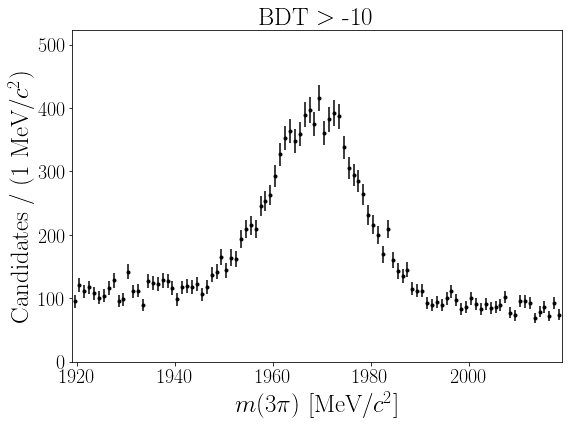

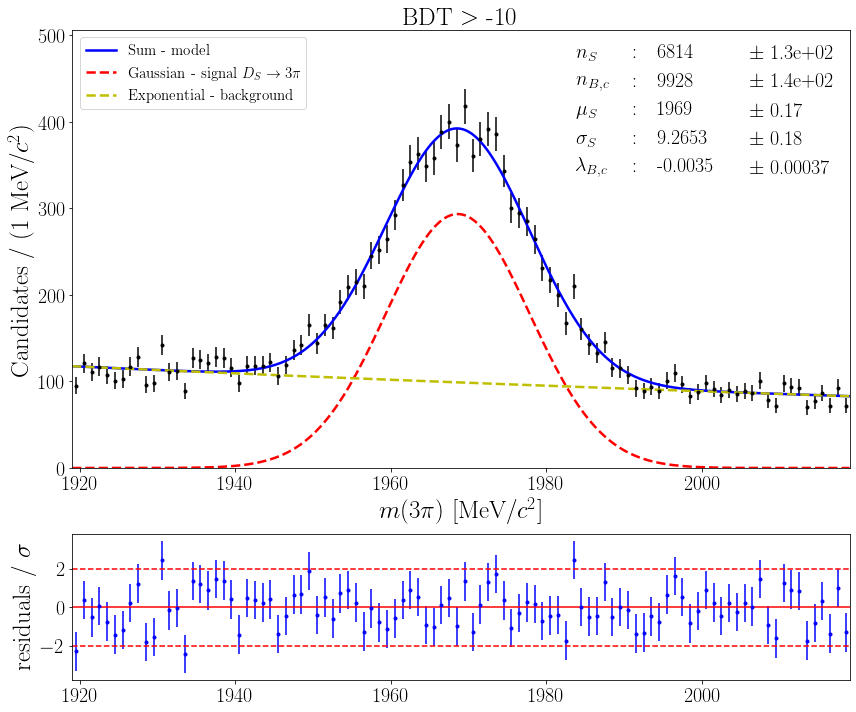

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi_detail/tau_M_common_Dstto3pi_detail_fit_BDT-10
Number of d.o.f. in the model:  5
Reduced chi2:  1.112186089955122


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


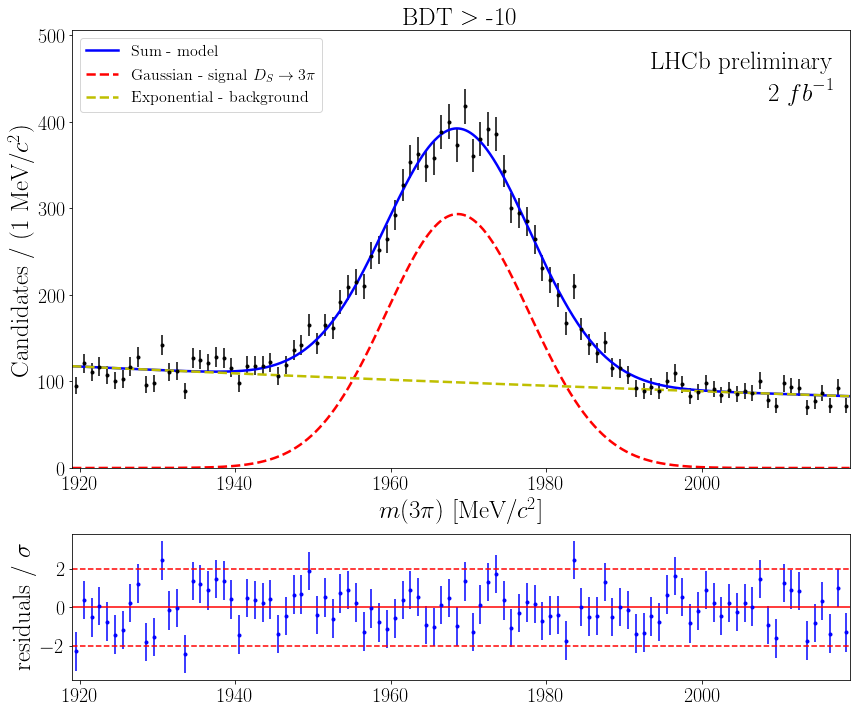

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi/tau_M_common_Dstto3pi_fit_BDT-10
0.047686369706341644
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_Dstto3pi/common_Dstto3pi_BDT-10_params.json
/afs/cern.ch/user/c/correian/bd2dst3pi/output/tables/common_Dstto3pi/common_Dstto3pi_BDT-10_params.tex
\begin{tabular}[t]{lc}
\hline
Variable &Fitted Value\\
\hline\hline
$\lambda_{bkg,c}$&$-0.00349\pm0.00037$\\
\hline
$\mu_{S}$&$1968.60\pm0.17$\\
\hline
$n_{bkg,c}$&$(9.93\pm0.14)\times 10^3$\\
\hline
$n_{S}$&$(6.81\pm0.13)\times 10^3$\\
\hline
$\sigma_{S}$&$9.27\pm0.18$\\
\hline
\end{tabular}


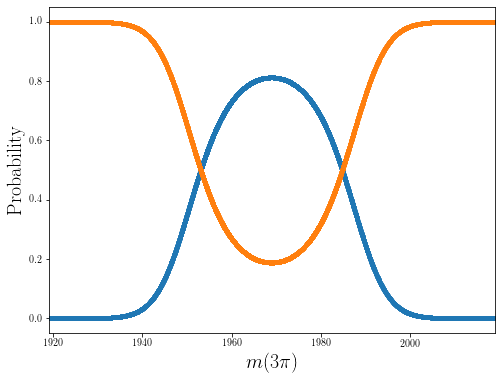

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


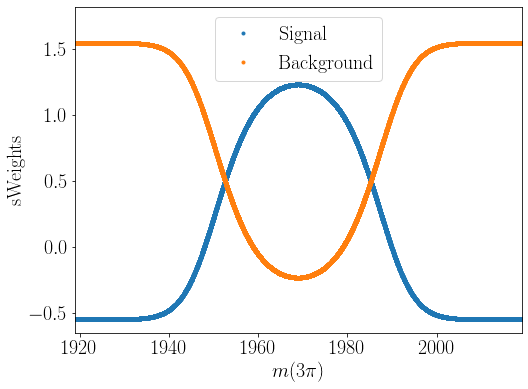

/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-10_sWeights.root
/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-10.root
================================ cut_BDT = -9.5 ================================
cut_BDT_ref = None
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_M_common_Dstto3pi_BDT-9.5
------------------------------------------------------------------
| FCN = -7.147e+04              |      Ncalls=72 (72 total)      |
| EDM = 0.000336 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
----------------

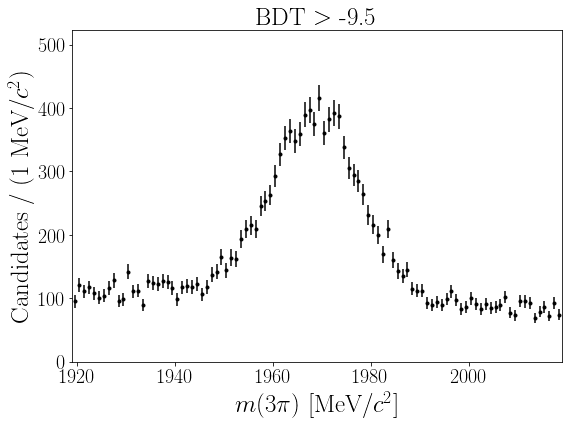

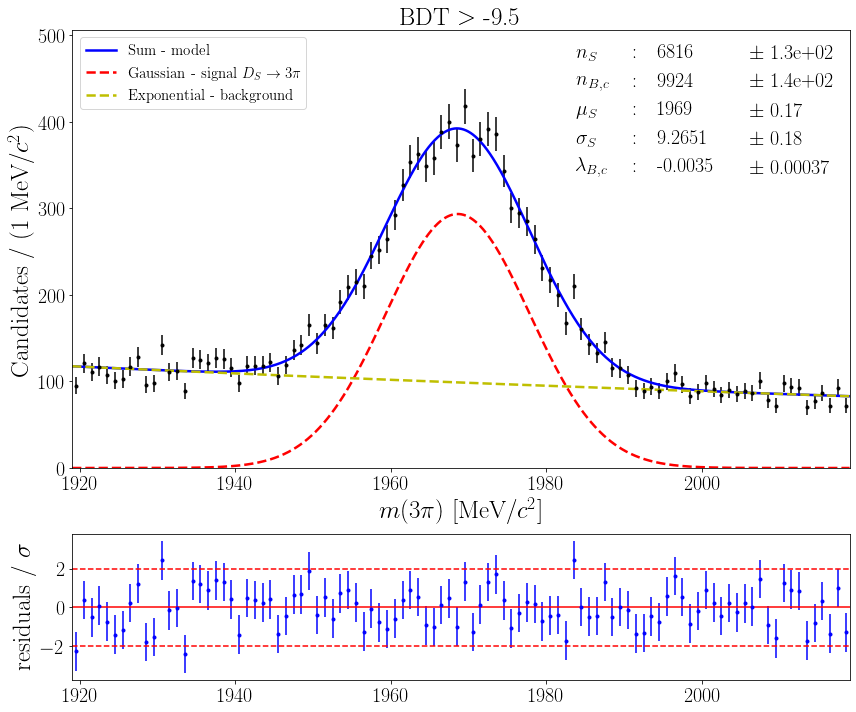

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi_detail/tau_M_common_Dstto3pi_detail_fit_BDT-9.5
Number of d.o.f. in the model:  5
Reduced chi2:  1.105351671944374


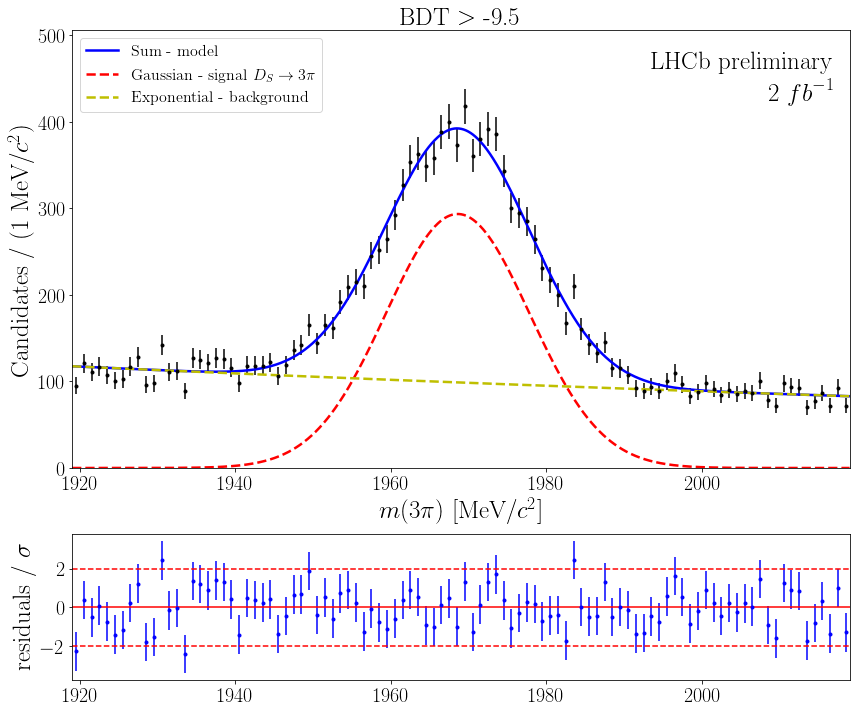

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi/tau_M_common_Dstto3pi_fit_BDT-9.5
0.04754788440505165
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_Dstto3pi/common_Dstto3pi_BDT-9.5_params.json
/afs/cern.ch/user/c/correian/bd2dst3pi/output/tables/common_Dstto3pi/common_Dstto3pi_BDT-9.5_params.tex
\begin{tabular}[t]{lc}
\hline
Variable &Fitted Value\\
\hline\hline
$\lambda_{bkg,c}$&$-0.00349\pm0.00037$\\
\hline
$\mu_{S}$&$1968.60\pm0.17$\\
\hline
$n_{bkg,c}$&$(9.92\pm0.14)\times 10^3$\\
\hline
$n_{S}$&$(6.82\pm0.13)\times 10^3$\\
\hline
$\sigma_{S}$&$9.27\pm0.18$\\
\hline
\end{tabular}


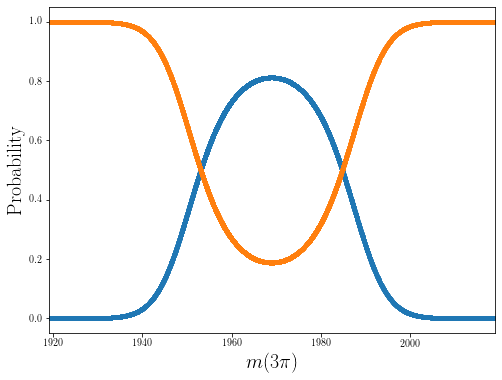

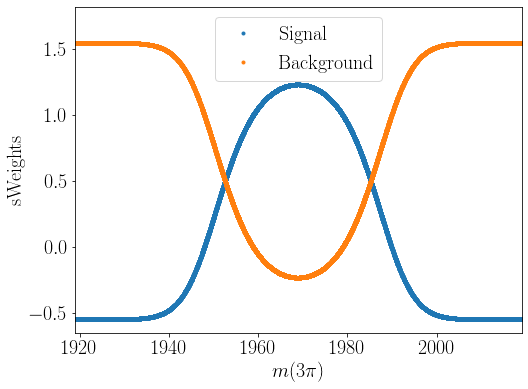

/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-9.5_sWeights.root
/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-9.5.root
================================ cut_BDT = -9 ================================
cut_BDT_ref = -9.5
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_M_common_Dstto3pi_BDT-9
------------------------------------------------------------------
| FCN = -7.14e+04               |      Ncalls=66 (66 total)      |
| EDM = 0.000142 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------

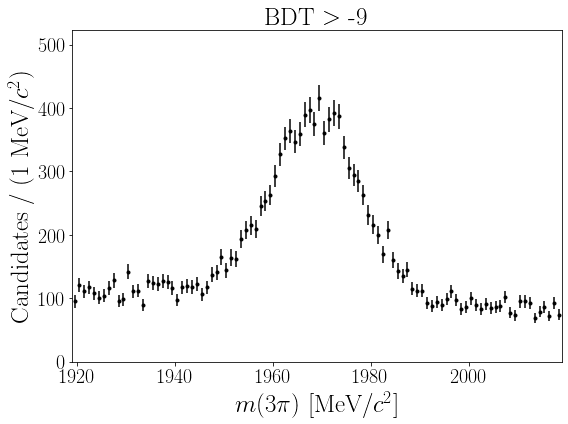

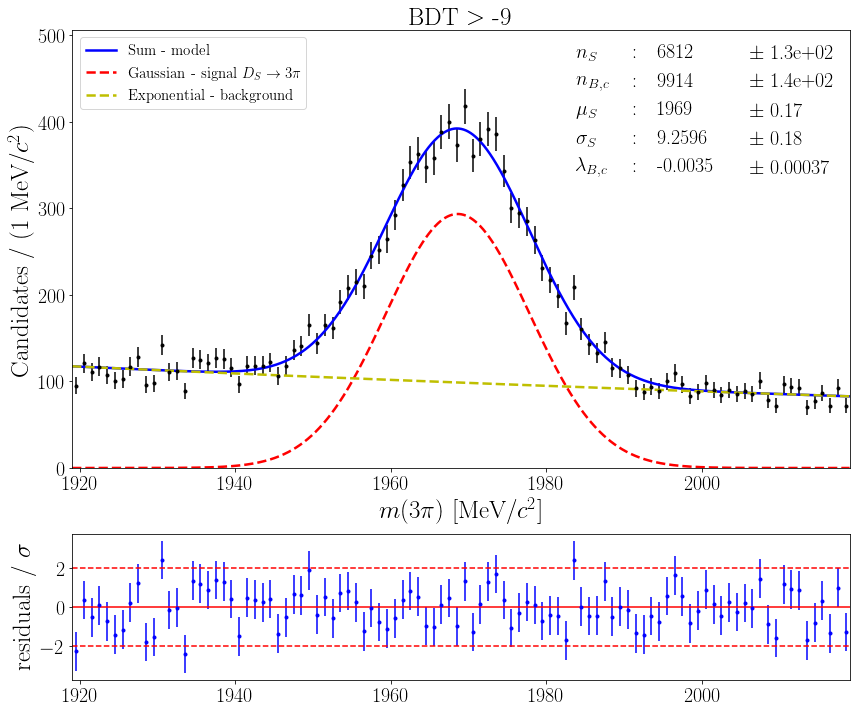

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi_detail/tau_M_common_Dstto3pi_detail_fit_BDT-9
Number of d.o.f. in the model:  5
Reduced chi2:  1.1032753542983365


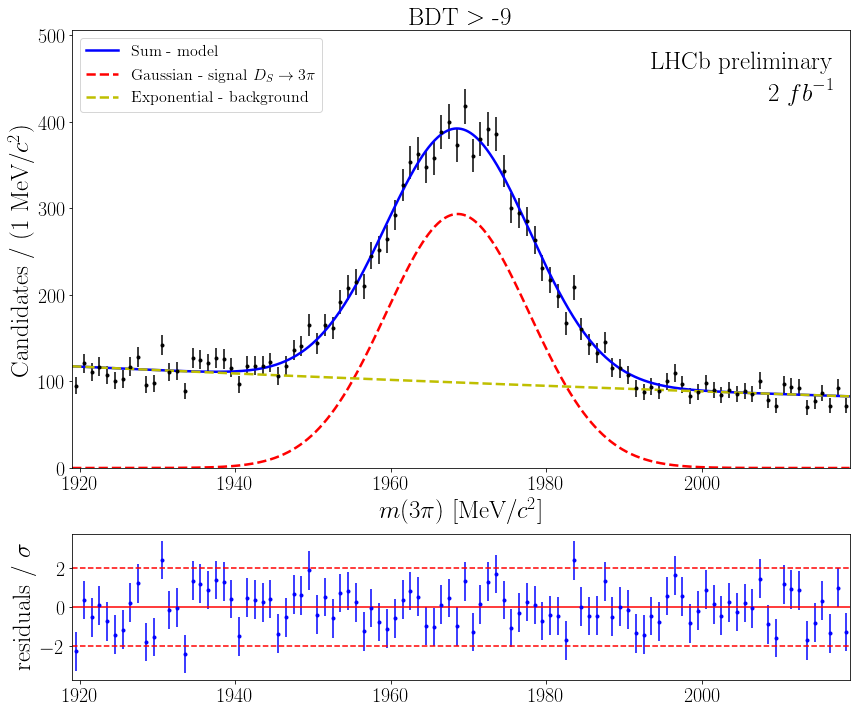

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi/tau_M_common_Dstto3pi_fit_BDT-9
0.0481208561506969
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_Dstto3pi/common_Dstto3pi_BDT-9_params.json
/afs/cern.ch/user/c/correian/bd2dst3pi/output/tables/common_Dstto3pi/common_Dstto3pi_BDT-9_params.tex
\begin{tabular}[t]{lc}
\hline
Variable &Fitted Value\\
\hline\hline
$\lambda_{bkg,c}$&$-0.00350\pm0.00037$\\
\hline
$\mu_{S}$&$1968.60\pm0.17$\\
\hline
$n_{bkg,c}$&$(9.91\pm0.14)\times 10^3$\\
\hline
$n_{S}$&$(6.81\pm0.13)\times 10^3$\\
\hline
$\sigma_{S}$&$9.26\pm0.18$\\
\hline
\end{tabular}


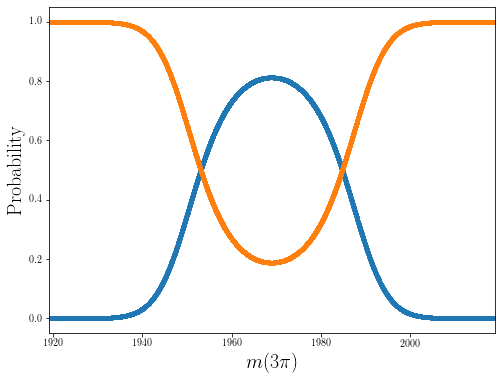

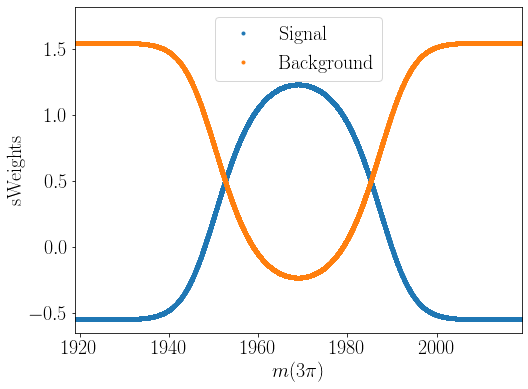

/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-9_sWeights.root
/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-9.root
================================ cut_BDT = -8.5 ================================
cut_BDT_ref = -9
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_M_common_Dstto3pi_BDT-8.5
------------------------------------------------------------------
| FCN = -7.128e+04              |     Ncalls=102 (102 total)     |
| EDM = 4.51e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
--------------------

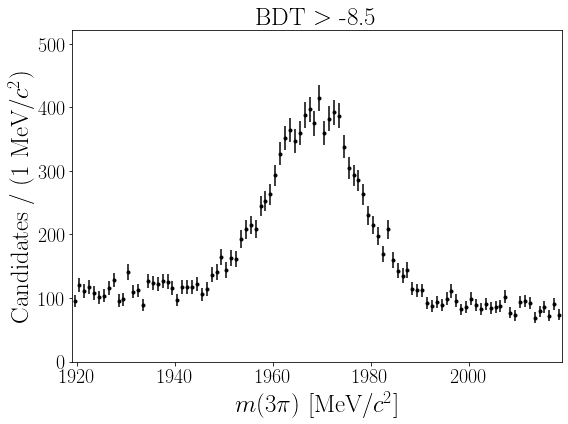

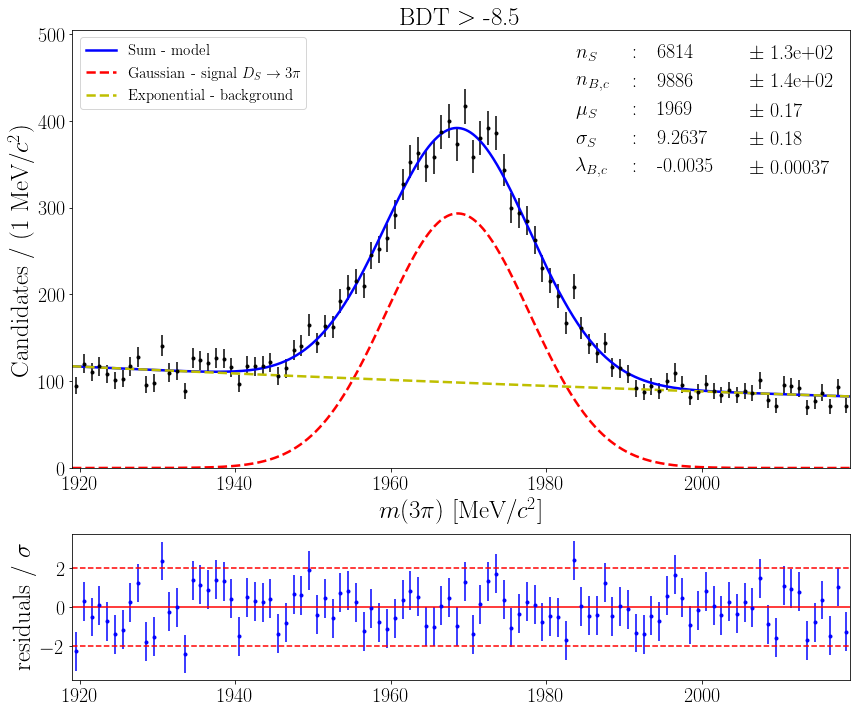

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi_detail/tau_M_common_Dstto3pi_detail_fit_BDT-8.5
Number of d.o.f. in the model:  5
Reduced chi2:  1.096601895697351


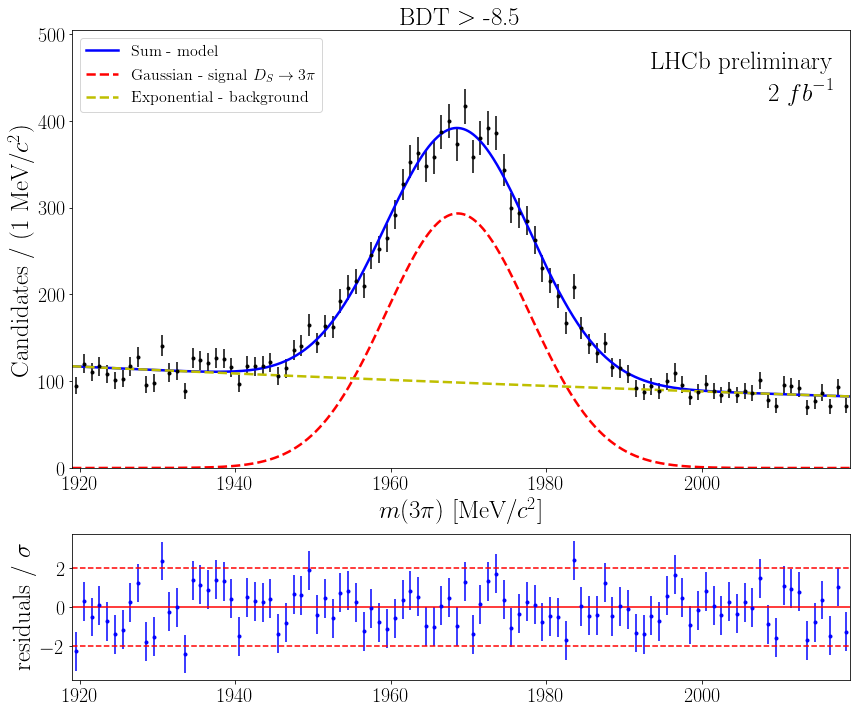

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi/tau_M_common_Dstto3pi_fit_BDT-8.5
0.04851881309157348
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_Dstto3pi/common_Dstto3pi_BDT-8.5_params.json
/afs/cern.ch/user/c/correian/bd2dst3pi/output/tables/common_Dstto3pi/common_Dstto3pi_BDT-8.5_params.tex
\begin{tabular}[t]{lc}
\hline
Variable &Fitted Value\\
\hline\hline
$\lambda_{bkg,c}$&$-0.00352\pm0.00037$\\
\hline
$\mu_{S}$&$1968.59\pm0.17$\\
\hline
$n_{bkg,c}$&$(9.89\pm0.14)\times 10^3$\\
\hline
$n_{S}$&$(6.81\pm0.13)\times 10^3$\\
\hline
$\sigma_{S}$&$9.26\pm0.18$\\
\hline
\end{tabular}


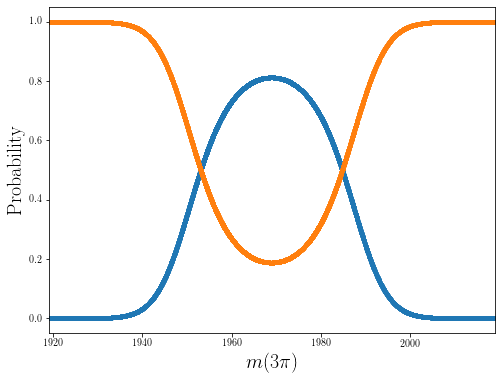

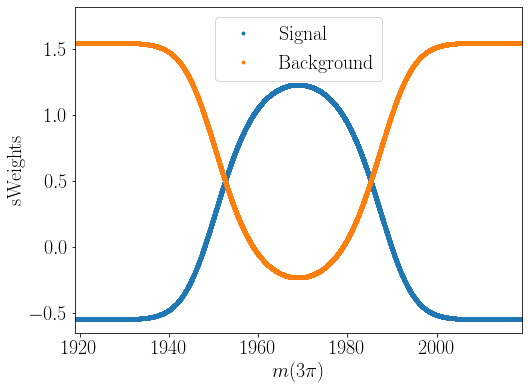

/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-8.5_sWeights.root
/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-8.5.root
================================ cut_BDT = -8 ================================
cut_BDT_ref = -8.5
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_M_common_Dstto3pi_BDT-8
------------------------------------------------------------------
| FCN = -7.094e+04              |      Ncalls=94 (94 total)      |
| EDM = 7.9e-05 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------

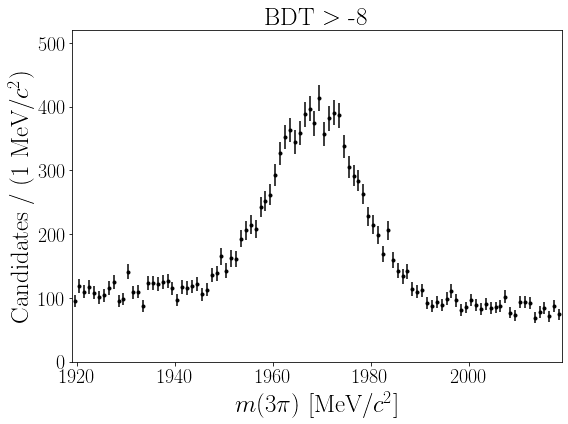

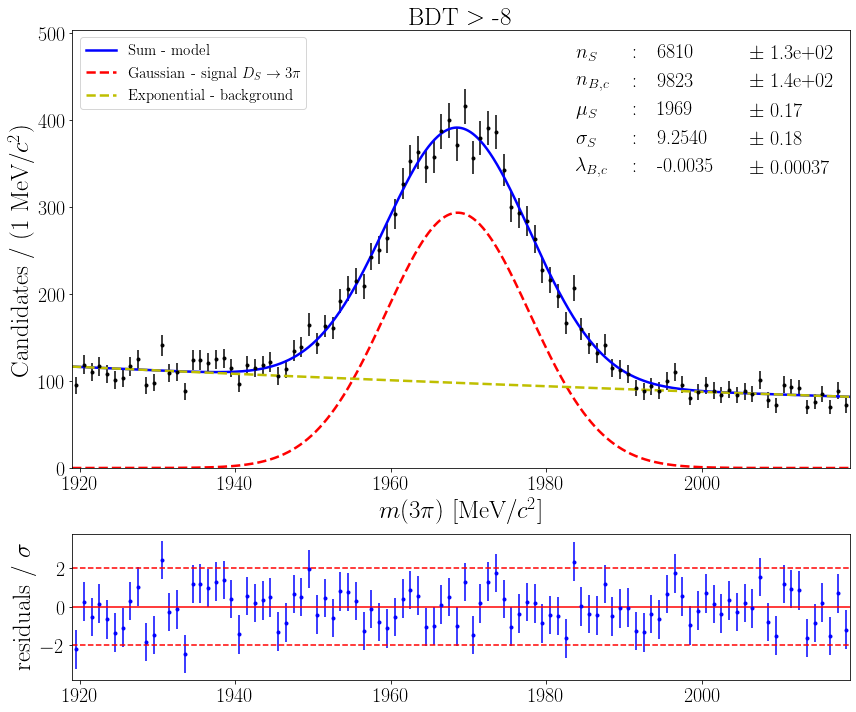

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi_detail/tau_M_common_Dstto3pi_detail_fit_BDT-8
Number of d.o.f. in the model:  5
Reduced chi2:  1.0711198919286318


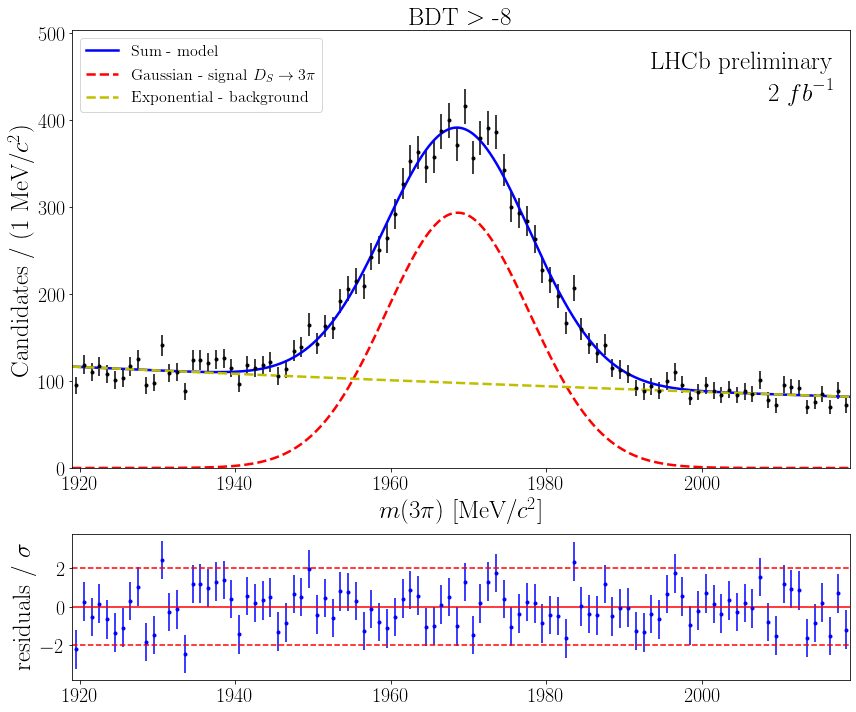

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi/tau_M_common_Dstto3pi_fit_BDT-8
0.049375354882747365
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_Dstto3pi/common_Dstto3pi_BDT-8_params.json
/afs/cern.ch/user/c/correian/bd2dst3pi/output/tables/common_Dstto3pi/common_Dstto3pi_BDT-8_params.tex
\begin{tabular}[t]{lc}
\hline
Variable &Fitted Value\\
\hline\hline
$\lambda_{bkg,c}$&$-0.00354\pm0.00037$\\
\hline
$\mu_{S}$&$1968.60\pm0.17$\\
\hline
$n_{bkg,c}$&$(9.82\pm0.14)\times 10^3$\\
\hline
$n_{S}$&$(6.81\pm0.13)\times 10^3$\\
\hline
$\sigma_{S}$&$9.25\pm0.18$\\
\hline
\end{tabular}


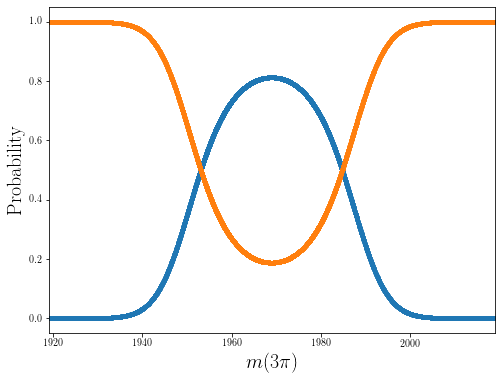

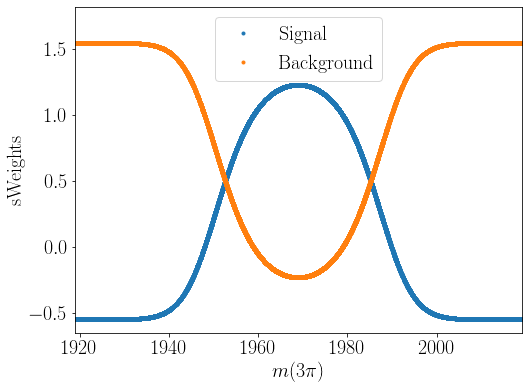

/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-8_sWeights.root
/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-8.root
================================ cut_BDT = -7.5 ================================
cut_BDT_ref = -8
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_M_common_Dstto3pi_BDT-7.5
------------------------------------------------------------------
| FCN = -7.034e+04              |      Ncalls=98 (98 total)      |
| EDM = 4.48e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
--------------------

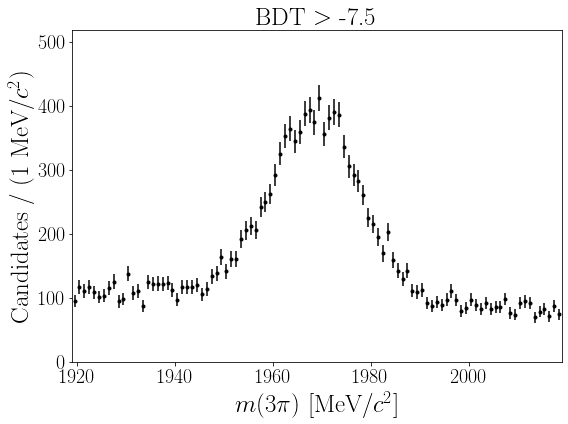

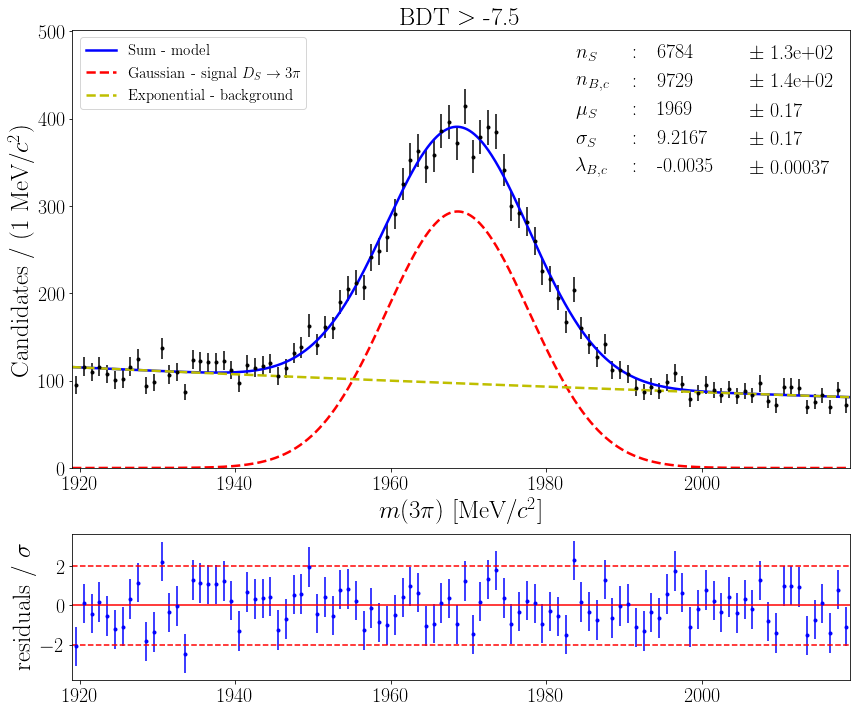

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi_detail/tau_M_common_Dstto3pi_detail_fit_BDT-7.5
Number of d.o.f. in the model:  5
Reduced chi2:  1.0140416273808648


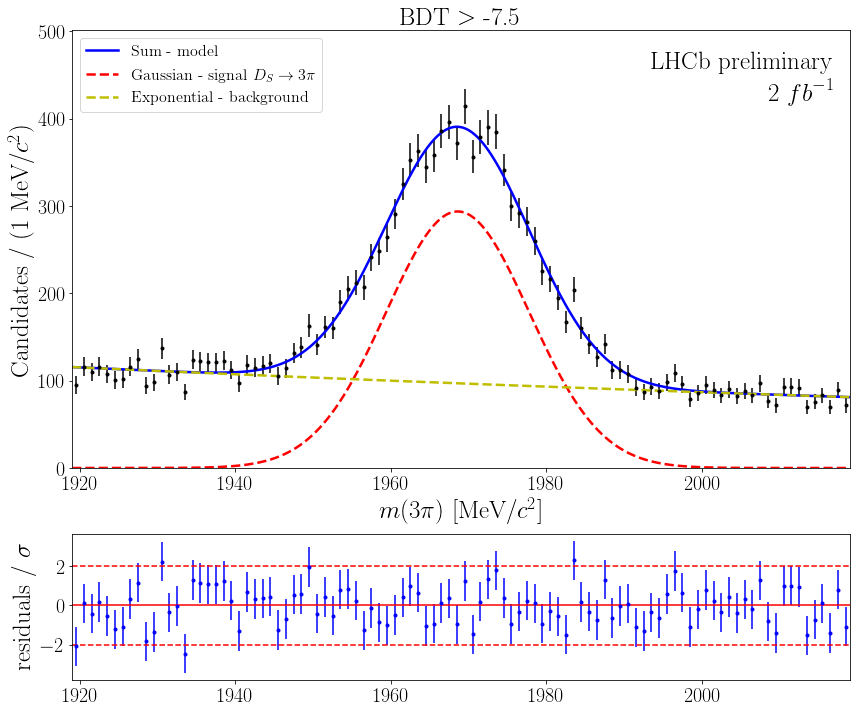

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi/tau_M_common_Dstto3pi_fit_BDT-7.5
0.04952066449835501
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_Dstto3pi/common_Dstto3pi_BDT-7.5_params.json
/afs/cern.ch/user/c/correian/bd2dst3pi/output/tables/common_Dstto3pi/common_Dstto3pi_BDT-7.5_params.tex
\begin{tabular}[t]{lc}
\hline
Variable &Fitted Value\\
\hline\hline
$\lambda_{bkg,c}$&$-0.00354\pm0.00037$\\
\hline
$\mu_{S}$&$1968.59\pm0.17$\\
\hline
$n_{bkg,c}$&$(9.73\pm0.14)\times 10^3$\\
\hline
$n_{S}$&$(6.78\pm0.13)\times 10^3$\\
\hline
$\sigma_{S}$&$9.22\pm0.17$\\
\hline
\end{tabular}


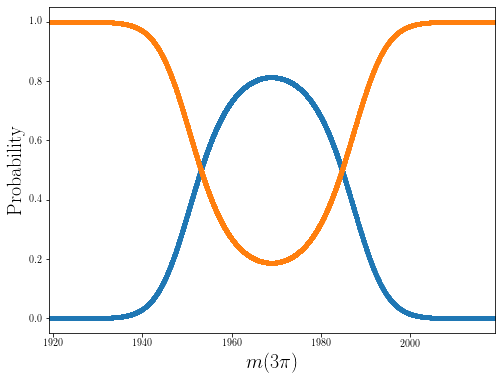

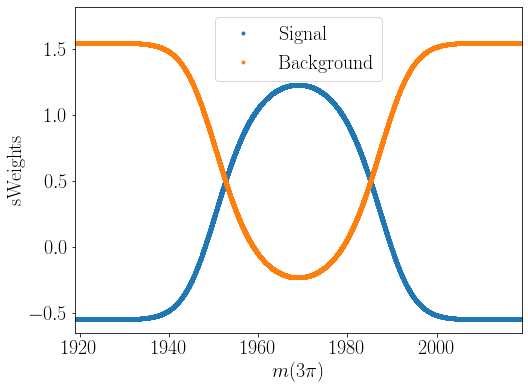

/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-7.5_sWeights.root
/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-7.5.root
================================ cut_BDT = -7 ================================
cut_BDT_ref = -7.5
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_M_common_Dstto3pi_BDT-7
------------------------------------------------------------------
| FCN = -6.936e+04              |      Ncalls=98 (98 total)      |
| EDM = 0.000211 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------

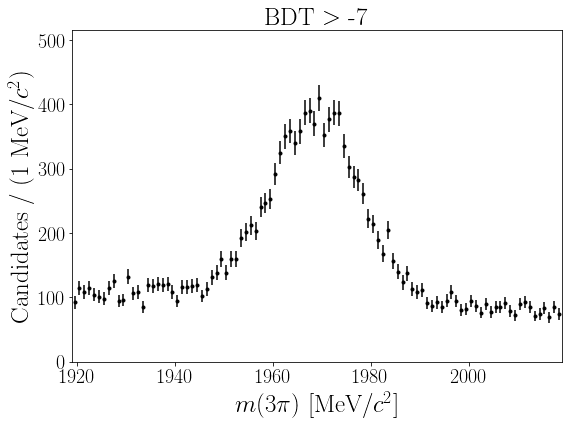

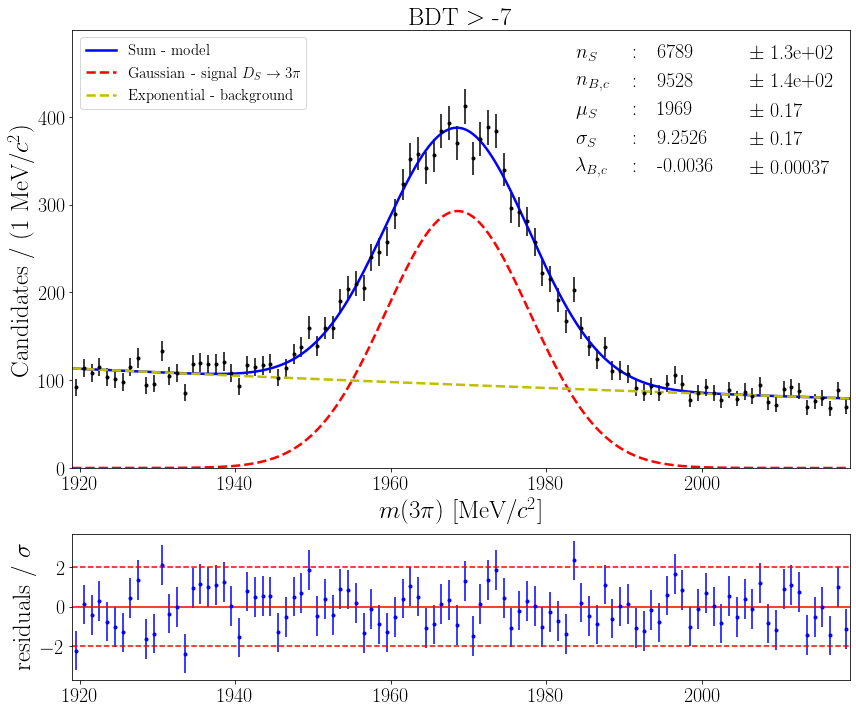

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi_detail/tau_M_common_Dstto3pi_detail_fit_BDT-7
Number of d.o.f. in the model:  5
Reduced chi2:  1.0170888397479076


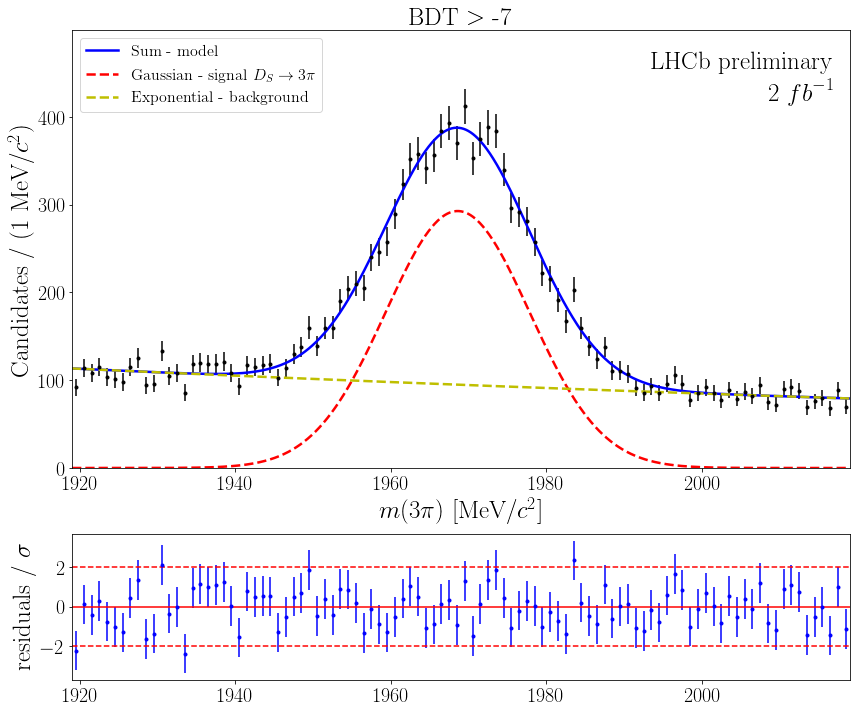

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi/tau_M_common_Dstto3pi_fit_BDT-7
0.0501149448312069
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_Dstto3pi/common_Dstto3pi_BDT-7_params.json
/afs/cern.ch/user/c/correian/bd2dst3pi/output/tables/common_Dstto3pi/common_Dstto3pi_BDT-7_params.tex
\begin{tabular}[t]{lc}
\hline
Variable &Fitted Value\\
\hline\hline
$\lambda_{bkg,c}$&$-0.00359\pm0.00037$\\
\hline
$\mu_{S}$&$1968.59\pm0.17$\\
\hline
$n_{bkg,c}$&$(9.53\pm0.14)\times 10^3$\\
\hline
$n_{S}$&$(6.79\pm0.13)\times 10^3$\\
\hline
$\sigma_{S}$&$9.25\pm0.17$\\
\hline
\end{tabular}


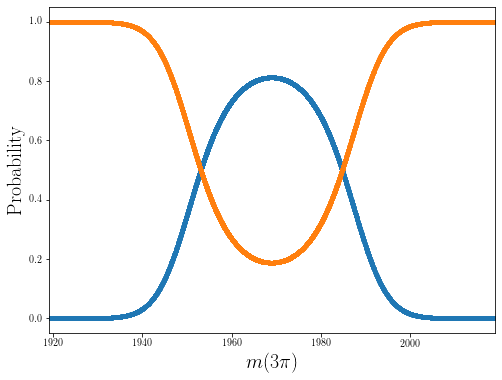

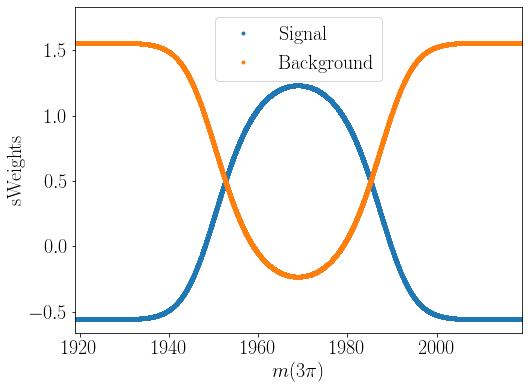

/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-7_sWeights.root
/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-7.root
================================ cut_BDT = -6.5 ================================
cut_BDT_ref = -7
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_M_common_Dstto3pi_BDT-6.5
------------------------------------------------------------------
| FCN = -6.812e+04              |     Ncalls=114 (114 total)     |
| EDM = 2.96e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
--------------------

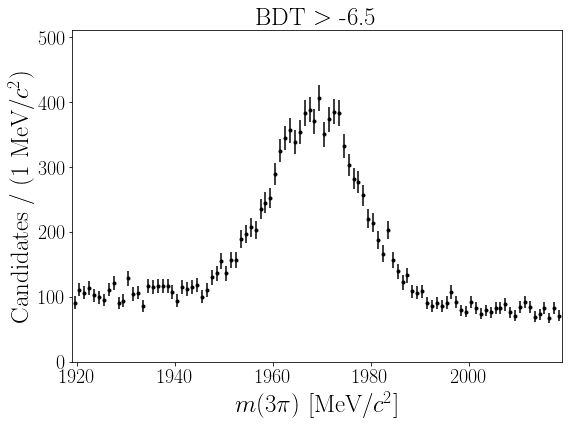

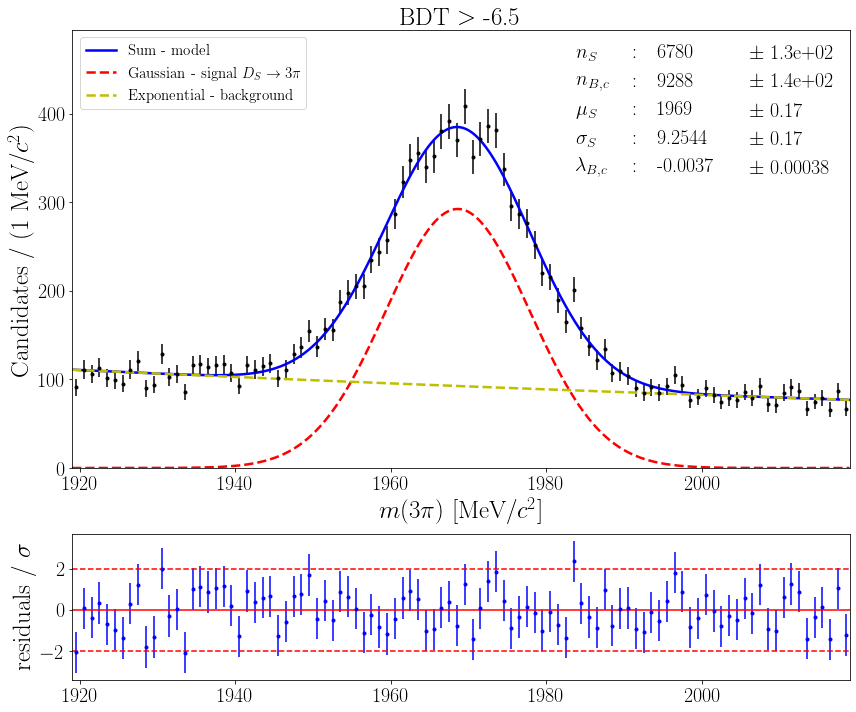

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi_detail/tau_M_common_Dstto3pi_detail_fit_BDT-6.5
Number of d.o.f. in the model:  5
Reduced chi2:  0.9567210732470588


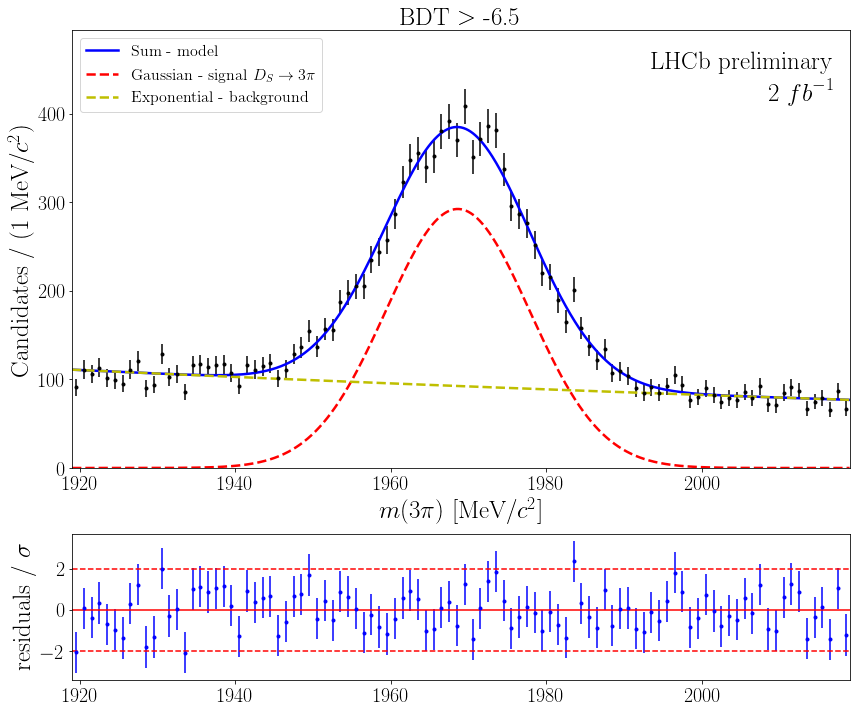

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi/tau_M_common_Dstto3pi_fit_BDT-6.5
0.051024008910378525
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_Dstto3pi/common_Dstto3pi_BDT-6.5_params.json
/afs/cern.ch/user/c/correian/bd2dst3pi/output/tables/common_Dstto3pi/common_Dstto3pi_BDT-6.5_params.tex
\begin{tabular}[t]{lc}
\hline
Variable &Fitted Value\\
\hline\hline
$\lambda_{bkg,c}$&$-0.00367\pm0.00038$\\
\hline
$\mu_{S}$&$1968.60\pm0.17$\\
\hline
$n_{bkg,c}$&$(9.29\pm0.14)\times 10^3$\\
\hline
$n_{S}$&$(6.78\pm0.13)\times 10^3$\\
\hline
$\sigma_{S}$&$9.25\pm0.17$\\
\hline
\end{tabular}


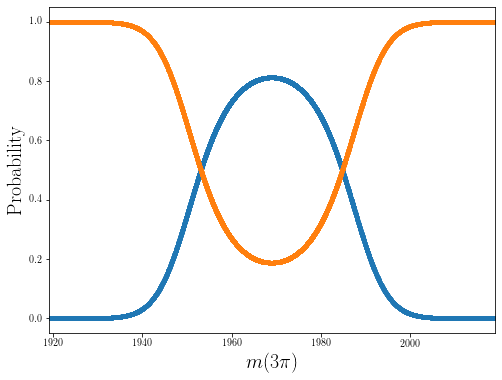

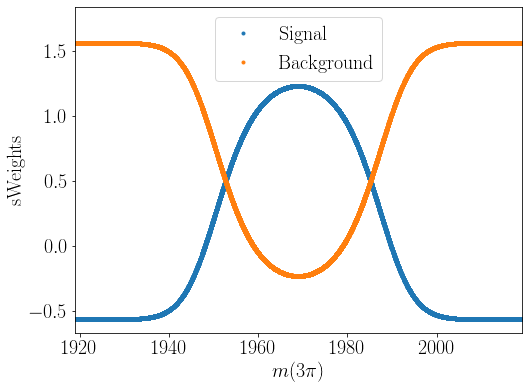

/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-6.5_sWeights.root
/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-6.5.root
================================ cut_BDT = -6 ================================
cut_BDT_ref = -6.5
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_M_common_Dstto3pi_BDT-6
------------------------------------------------------------------
| FCN = -6.654e+04              |      Ncalls=98 (98 total)      |
| EDM = 9.97e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------

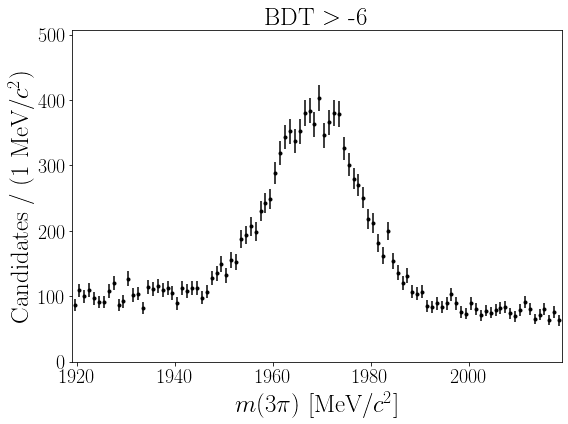

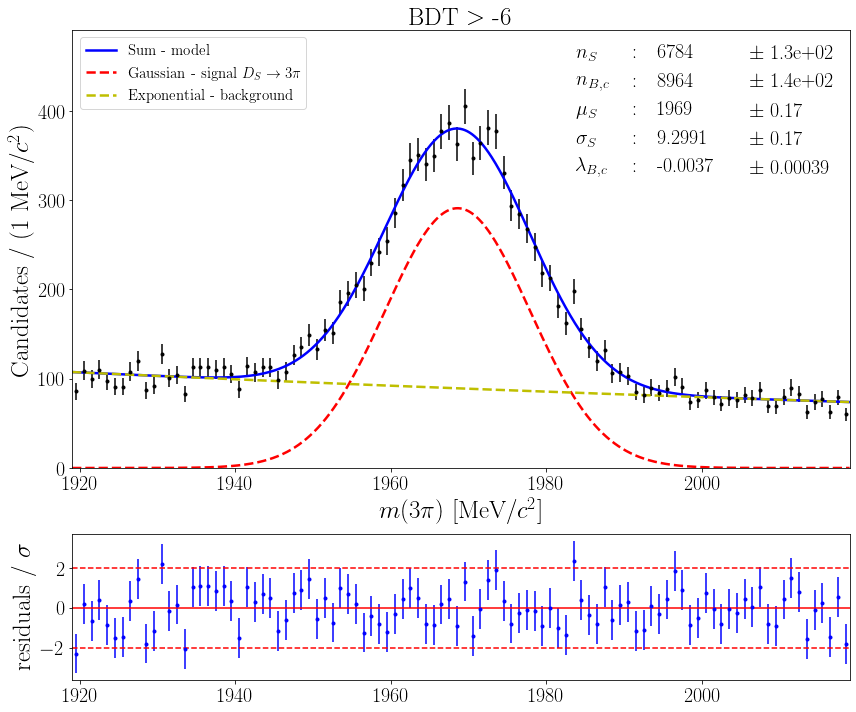

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi_detail/tau_M_common_Dstto3pi_detail_fit_BDT-6
Number of d.o.f. in the model:  5
Reduced chi2:  1.0267011217122435


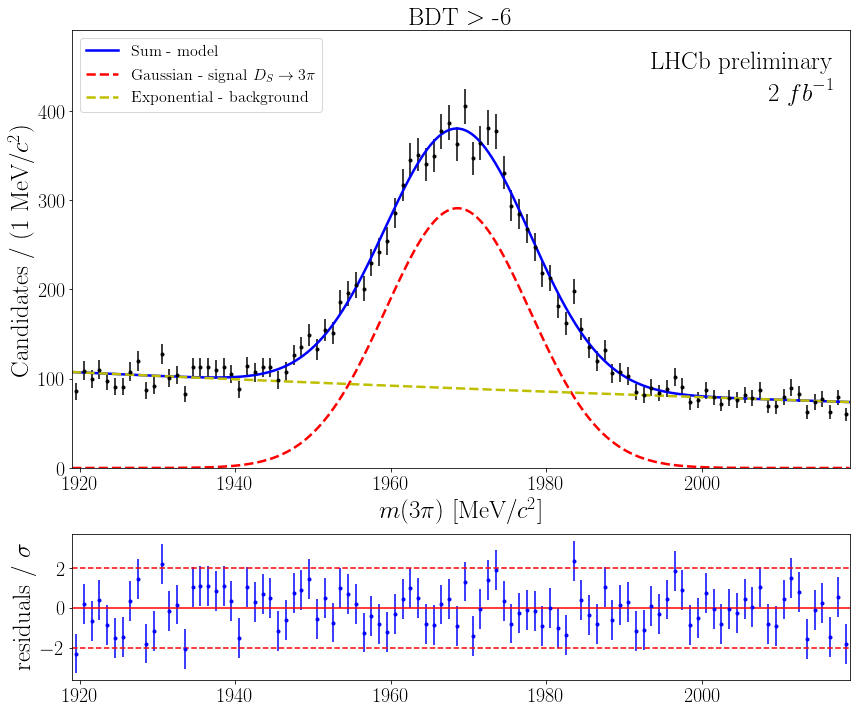

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi/tau_M_common_Dstto3pi_fit_BDT-6
0.05161218396239329
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_Dstto3pi/common_Dstto3pi_BDT-6_params.json
/afs/cern.ch/user/c/correian/bd2dst3pi/output/tables/common_Dstto3pi/common_Dstto3pi_BDT-6_params.tex
\begin{tabular}[t]{lc}
\hline
Variable &Fitted Value\\
\hline\hline
$\lambda_{bkg,c}$&$-0.00375\pm0.00039$\\
\hline
$\mu_{S}$&$1968.58\pm0.17$\\
\hline
$n_{bkg,c}$&$(8.96\pm0.14)\times 10^3$\\
\hline
$n_{S}$&$(6.78\pm0.13)\times 10^3$\\
\hline
$\sigma_{S}$&$9.30\pm0.17$\\
\hline
\end{tabular}


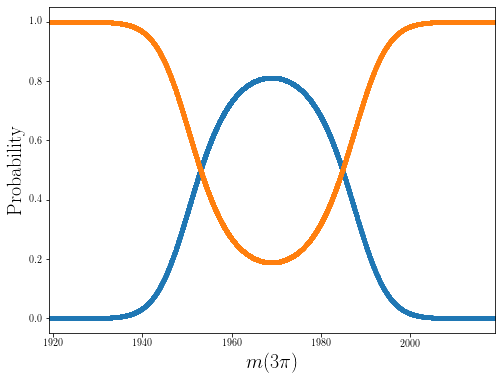

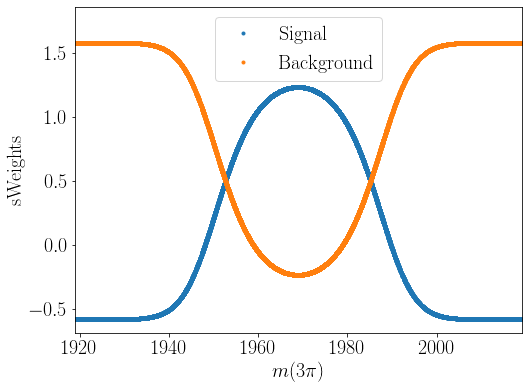

/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-6_sWeights.root
/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-6.root
================================ cut_BDT = -5.5 ================================
cut_BDT_ref = -6
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_M_common_Dstto3pi_BDT-5.5
------------------------------------------------------------------
| FCN = -6.469e+04              |     Ncalls=102 (102 total)     |
| EDM = 0.000226 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
--------------------

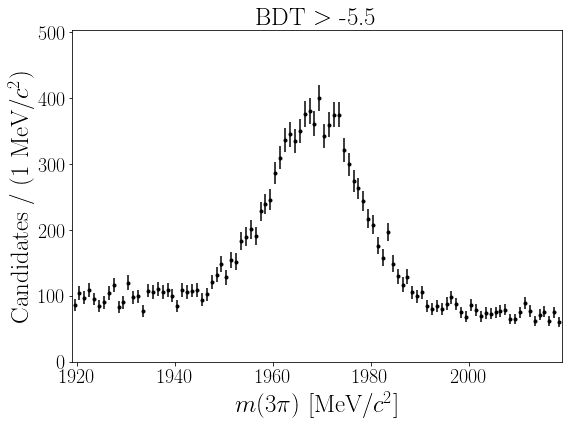

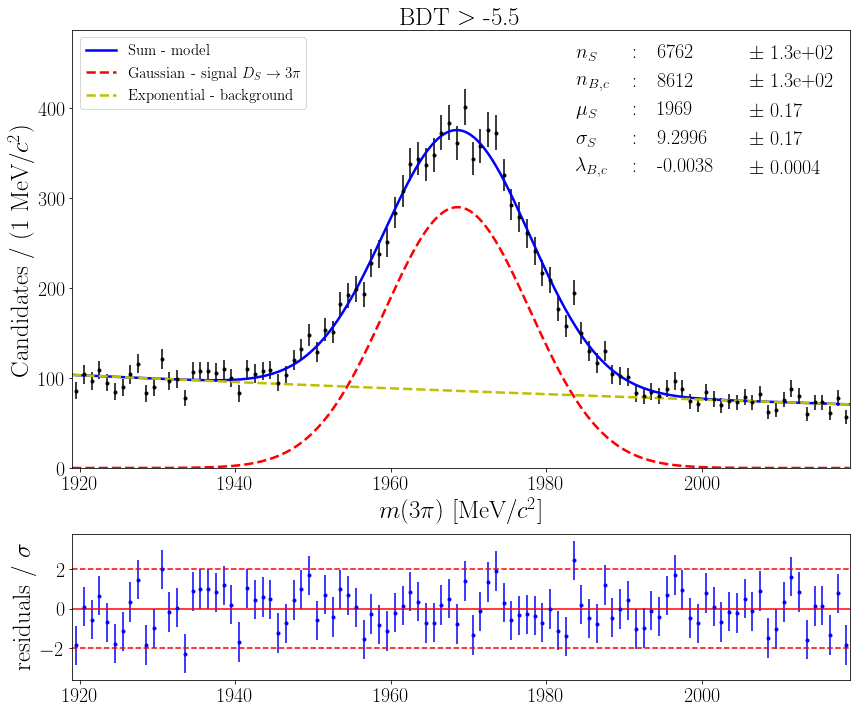

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi_detail/tau_M_common_Dstto3pi_detail_fit_BDT-5.5
Number of d.o.f. in the model:  5
Reduced chi2:  1.025999725837593


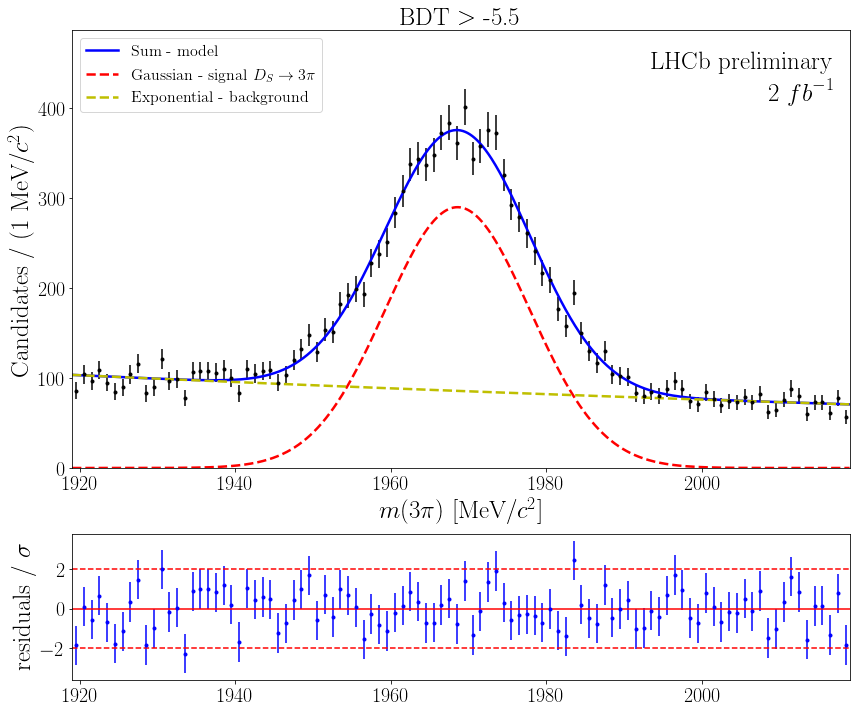

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi/tau_M_common_Dstto3pi_fit_BDT-5.5
0.0502282380473283
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_Dstto3pi/common_Dstto3pi_BDT-5.5_params.json
/afs/cern.ch/user/c/correian/bd2dst3pi/output/tables/common_Dstto3pi/common_Dstto3pi_BDT-5.5_params.tex
\begin{tabular}[t]{lc}
\hline
Variable &Fitted Value\\
\hline\hline
$\lambda_{bkg,c}$&$-0.00381\pm0.00040$\\
\hline
$\mu_{S}$&$1968.57\pm0.17$\\
\hline
$n_{bkg,c}$&$(8.61\pm0.13)\times 10^3$\\
\hline
$n_{S}$&$(6.76\pm0.13)\times 10^3$\\
\hline
$\sigma_{S}$&$9.30\pm0.17$\\
\hline
\end{tabular}


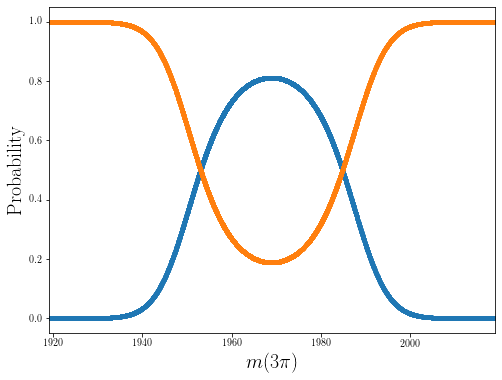

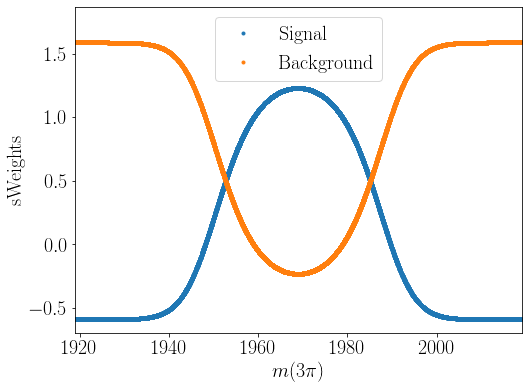

/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-5.5_sWeights.root
/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-5.5.root
================================ cut_BDT = -5 ================================
cut_BDT_ref = -5.5
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_M_common_Dstto3pi_BDT-5
------------------------------------------------------------------
| FCN = -6.274e+04              |      Ncalls=95 (95 total)      |
| EDM = 0.000431 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------

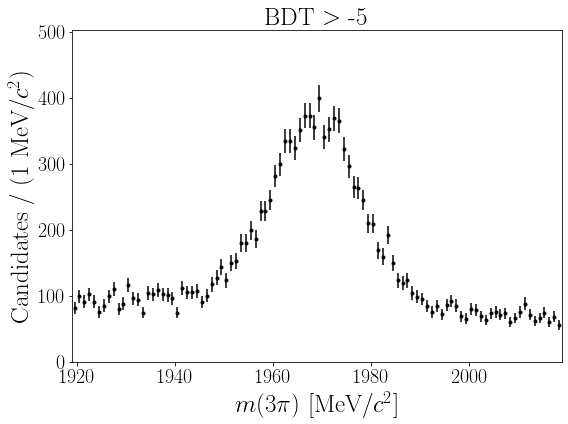

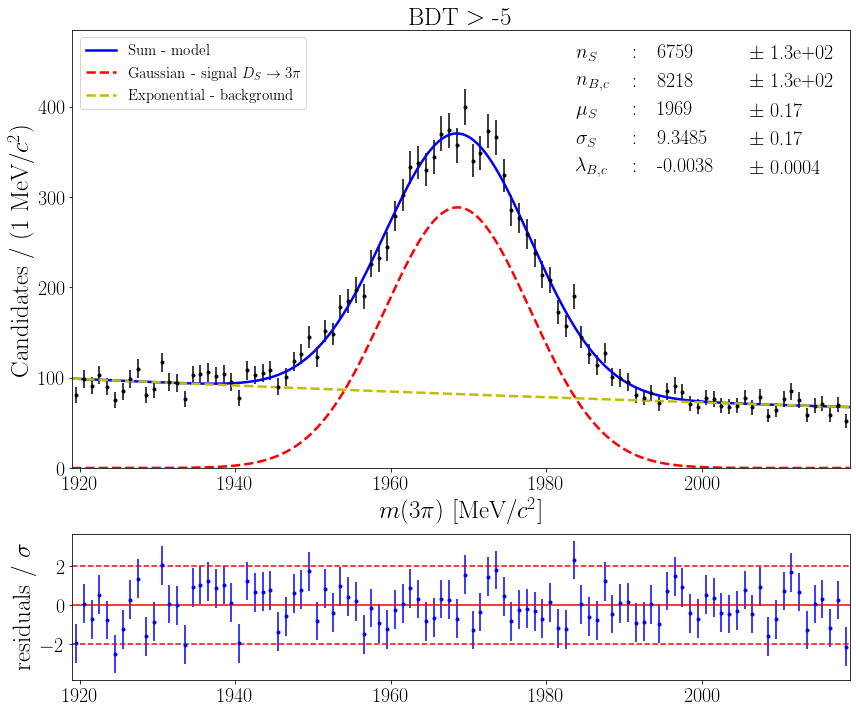

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi_detail/tau_M_common_Dstto3pi_detail_fit_BDT-5
Number of d.o.f. in the model:  5
Reduced chi2:  1.0746278798428468


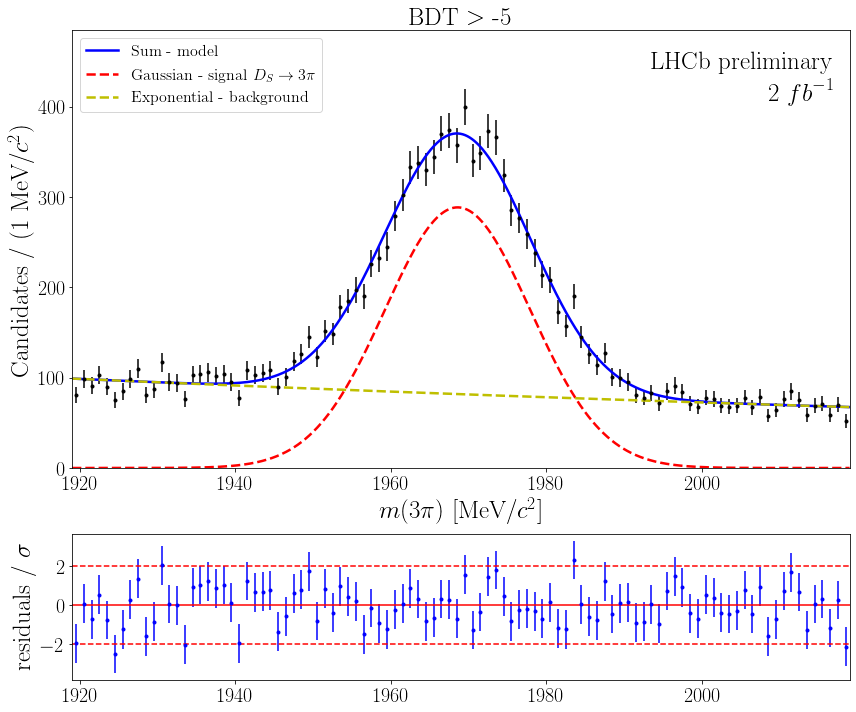

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi/tau_M_common_Dstto3pi_fit_BDT-5
0.05135789342458492
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_Dstto3pi/common_Dstto3pi_BDT-5_params.json
/afs/cern.ch/user/c/correian/bd2dst3pi/output/tables/common_Dstto3pi/common_Dstto3pi_BDT-5_params.tex
\begin{tabular}[t]{lc}
\hline
Variable &Fitted Value\\
\hline\hline
$\lambda_{bkg,c}$&$-0.00384\pm0.00040$\\
\hline
$\mu_{S}$&$1968.58\pm0.17$\\
\hline
$n_{bkg,c}$&$(8.22\pm0.13)\times 10^3$\\
\hline
$n_{S}$&$(6.76\pm0.13)\times 10^3$\\
\hline
$\sigma_{S}$&$9.35\pm0.17$\\
\hline
\end{tabular}


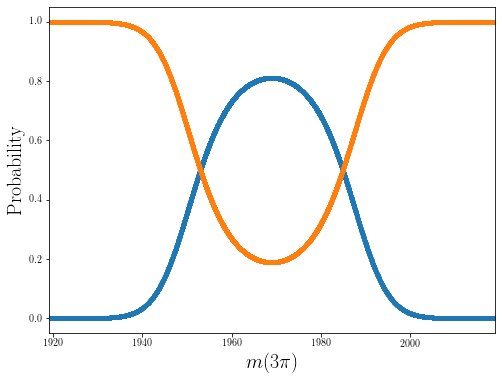

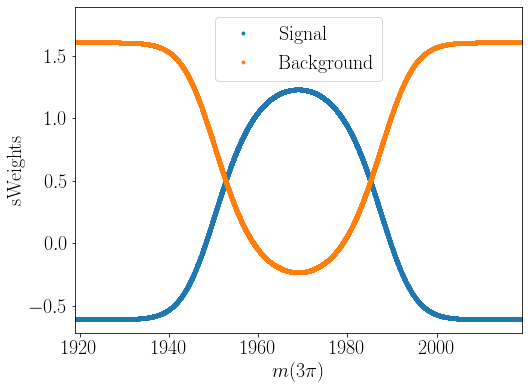

/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-5_sWeights.root
/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-5.root
================================ cut_BDT = -4.5 ================================
cut_BDT_ref = -5
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_M_common_Dstto3pi_BDT-4.5
------------------------------------------------------------------
| FCN = -6.046e+04              |      Ncalls=96 (96 total)      |
| EDM = 0.000652 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
--------------------

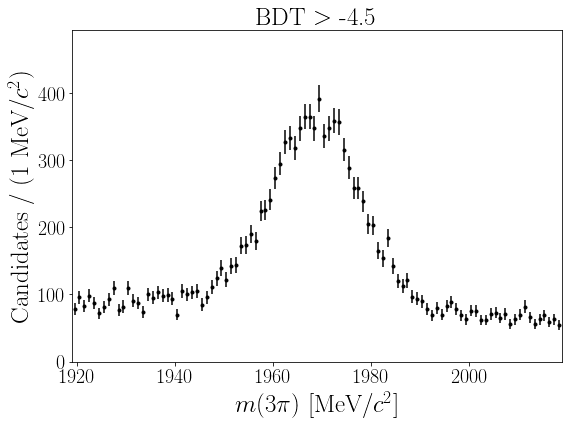

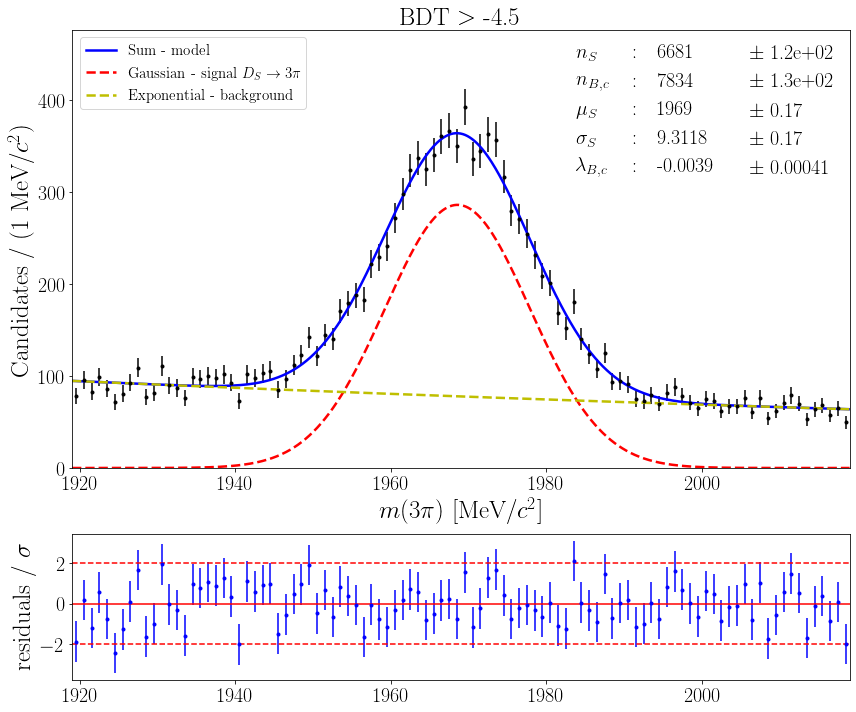

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi_detail/tau_M_common_Dstto3pi_detail_fit_BDT-4.5
Number of d.o.f. in the model:  5
Reduced chi2:  1.0573251486995283


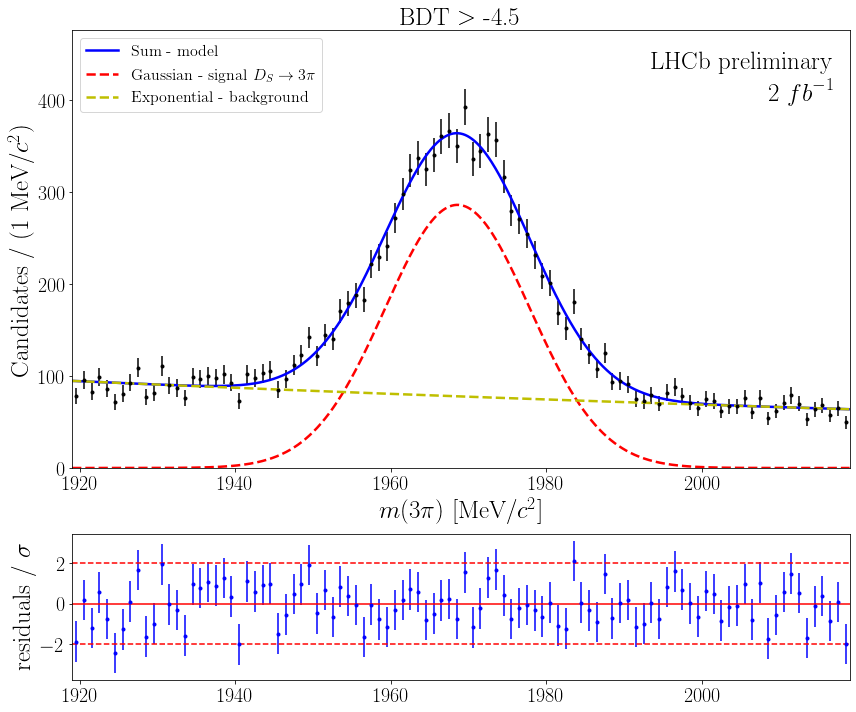

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi/tau_M_common_Dstto3pi_fit_BDT-4.5
0.04943672579341469
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_Dstto3pi/common_Dstto3pi_BDT-4.5_params.json
/afs/cern.ch/user/c/correian/bd2dst3pi/output/tables/common_Dstto3pi/common_Dstto3pi_BDT-4.5_params.tex
\begin{tabular}[t]{lc}
\hline
Variable &Fitted Value\\
\hline\hline
$\lambda_{bkg,c}$&$-0.00394\pm0.00041$\\
\hline
$\mu_{S}$&$1968.57\pm0.17$\\
\hline
$n_{bkg,c}$&$(7.83\pm0.13)\times 10^3$\\
\hline
$n_{S}$&$(6.68\pm0.12)\times 10^3$\\
\hline
$\sigma_{S}$&$9.31\pm0.17$\\
\hline
\end{tabular}


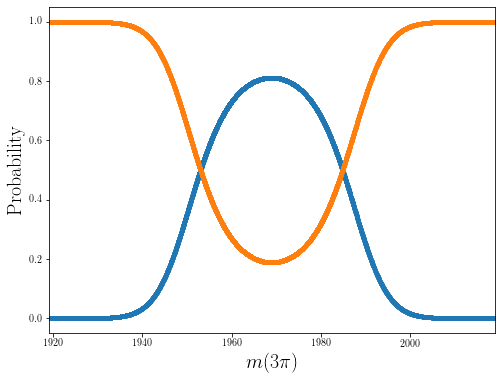

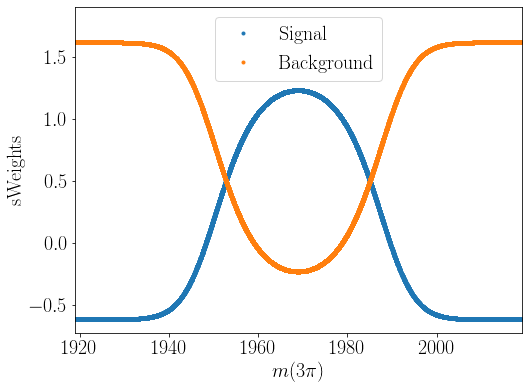

/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-4.5_sWeights.root
/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-4.5.root
================================ cut_BDT = -4 ================================
cut_BDT_ref = -4.5
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_M_common_Dstto3pi_BDT-4
------------------------------------------------------------------
| FCN = -5.822e+04              |     Ncalls=100 (100 total)     |
| EDM = 4.09e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------

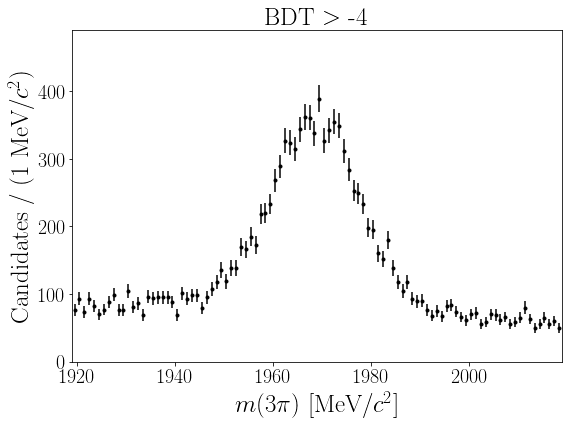

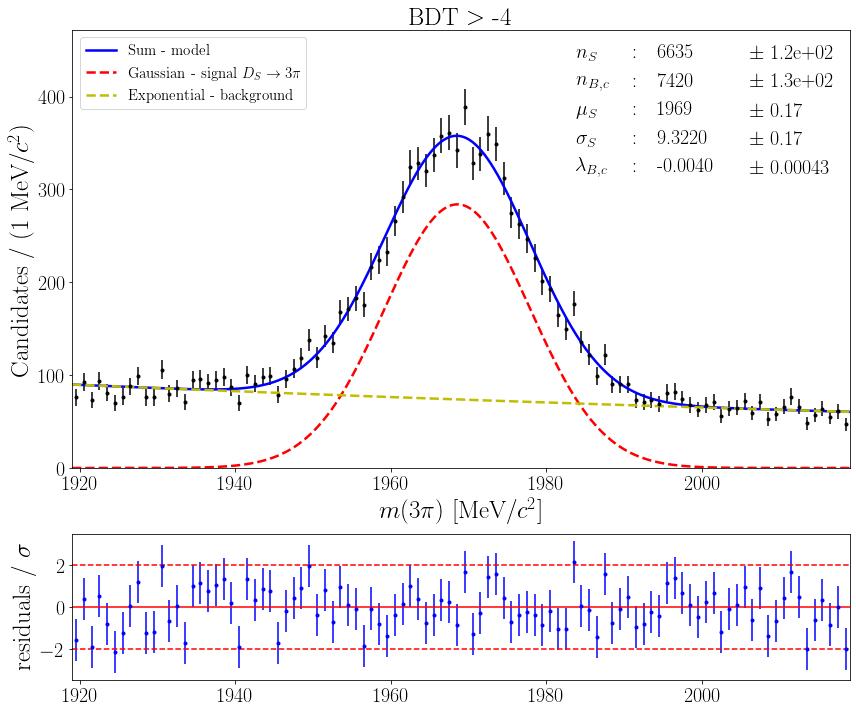

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi_detail/tau_M_common_Dstto3pi_detail_fit_BDT-4
Number of d.o.f. in the model:  5
Reduced chi2:  1.092915809174101


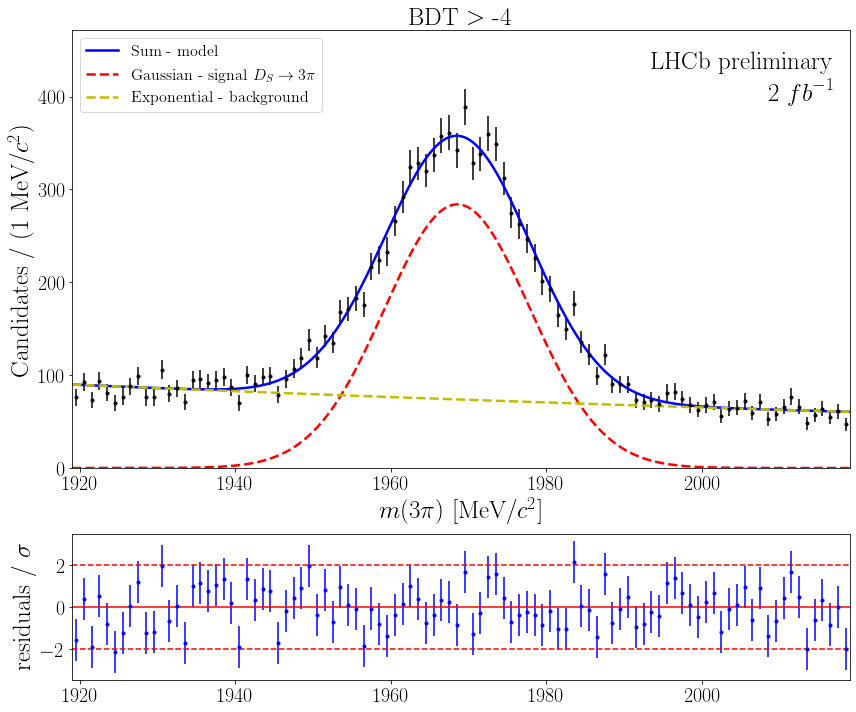

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi/tau_M_common_Dstto3pi_fit_BDT-4
0.048869837277271705
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_Dstto3pi/common_Dstto3pi_BDT-4_params.json
/afs/cern.ch/user/c/correian/bd2dst3pi/output/tables/common_Dstto3pi/common_Dstto3pi_BDT-4_params.tex
\begin{tabular}[t]{lc}
\hline
Variable &Fitted Value\\
\hline\hline
$\lambda_{bkg,c}$&$-0.00397\pm0.00043$\\
\hline
$\mu_{S}$&$1968.55\pm0.17$\\
\hline
$n_{bkg,c}$&$(7.42\pm0.13)\times 10^3$\\
\hline
$n_{S}$&$(6.64\pm0.12)\times 10^3$\\
\hline
$\sigma_{S}$&$9.32\pm0.17$\\
\hline
\end{tabular}


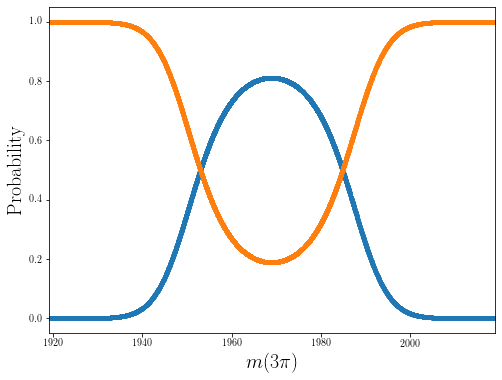

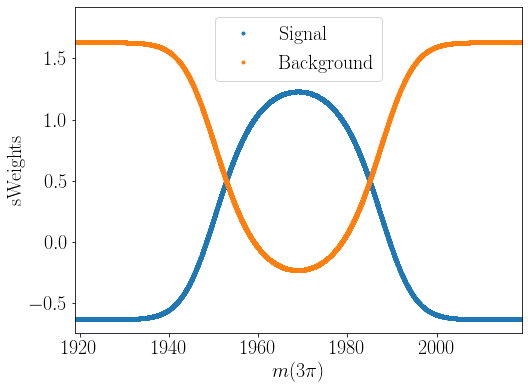

/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-4_sWeights.root
/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-4.root
================================ cut_BDT = -3.5 ================================
cut_BDT_ref = -4
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_M_common_Dstto3pi_BDT-3.5
------------------------------------------------------------------
| FCN = -5.625e+04              |     Ncalls=112 (112 total)     |
| EDM = 1.01e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
--------------------

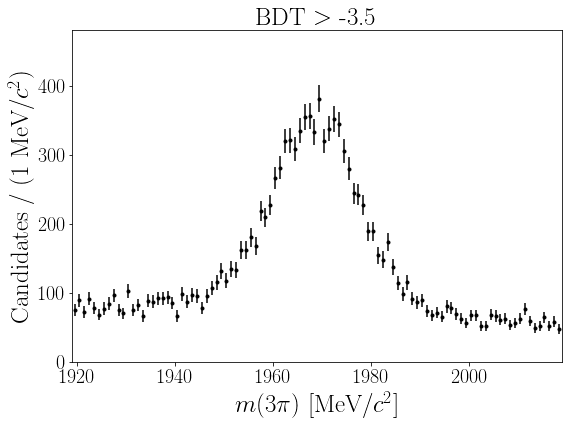

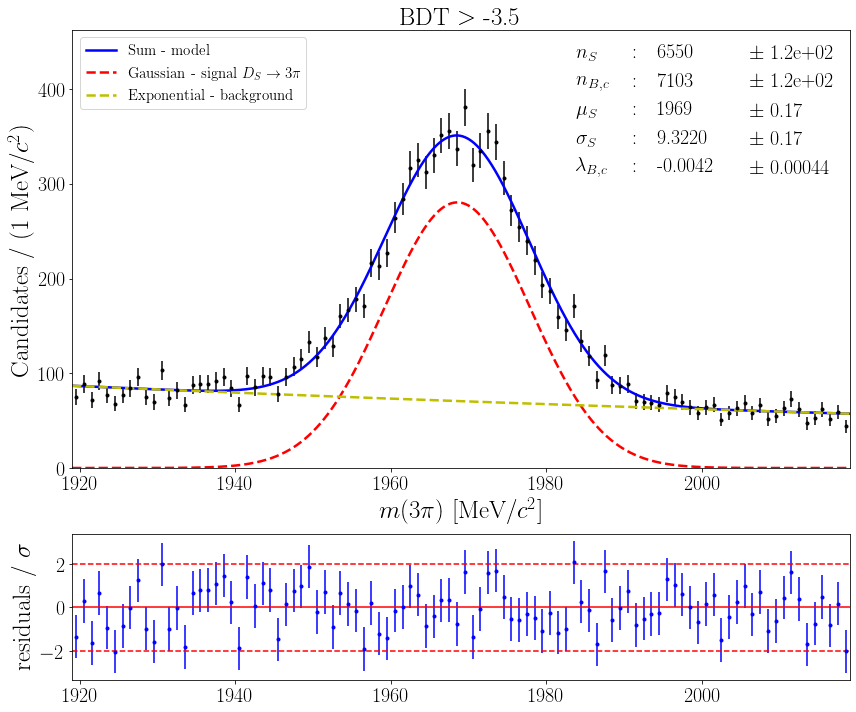

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi_detail/tau_M_common_Dstto3pi_detail_fit_BDT-3.5
Number of d.o.f. in the model:  5
Reduced chi2:  1.092741178927682


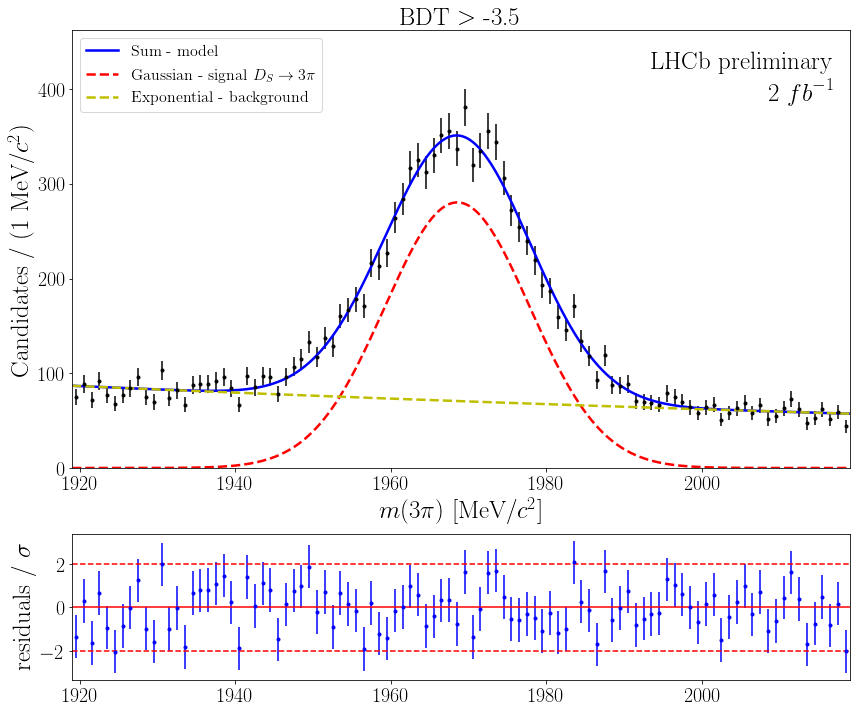

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi/tau_M_common_Dstto3pi_fit_BDT-3.5
0.0486095598045961
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_Dstto3pi/common_Dstto3pi_BDT-3.5_params.json
/afs/cern.ch/user/c/correian/bd2dst3pi/output/tables/common_Dstto3pi/common_Dstto3pi_BDT-3.5_params.tex
\begin{tabular}[t]{lc}
\hline
Variable &Fitted Value\\
\hline\hline
$\lambda_{bkg,c}$&$-0.00415\pm0.00044$\\
\hline
$\mu_{S}$&$1968.54\pm0.17$\\
\hline
$n_{bkg,c}$&$(7.10\pm0.12)\times 10^3$\\
\hline
$n_{S}$&$(6.55\pm0.12)\times 10^3$\\
\hline
$\sigma_{S}$&$9.32\pm0.17$\\
\hline
\end{tabular}


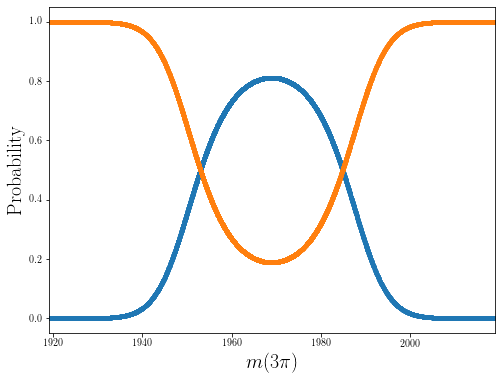

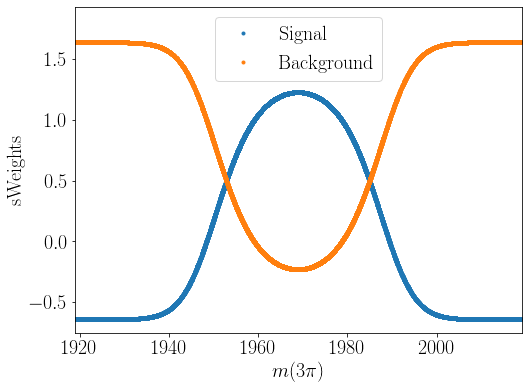

/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-3.5_sWeights.root
/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-3.5.root
================================ cut_BDT = -3 ================================
cut_BDT_ref = -3.5
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_M_common_Dstto3pi_BDT-3
------------------------------------------------------------------
| FCN = -5.428e+04              |     Ncalls=110 (110 total)     |
| EDM = 3.15e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------

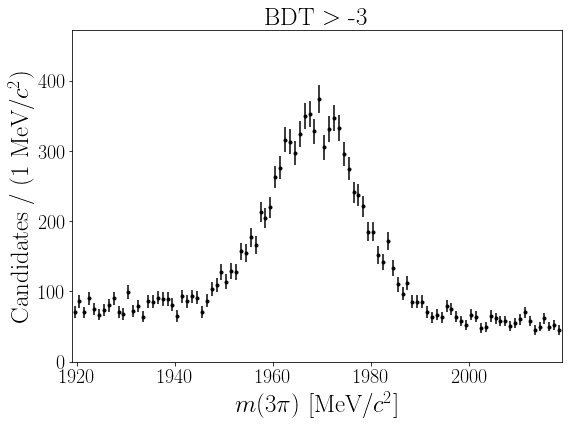

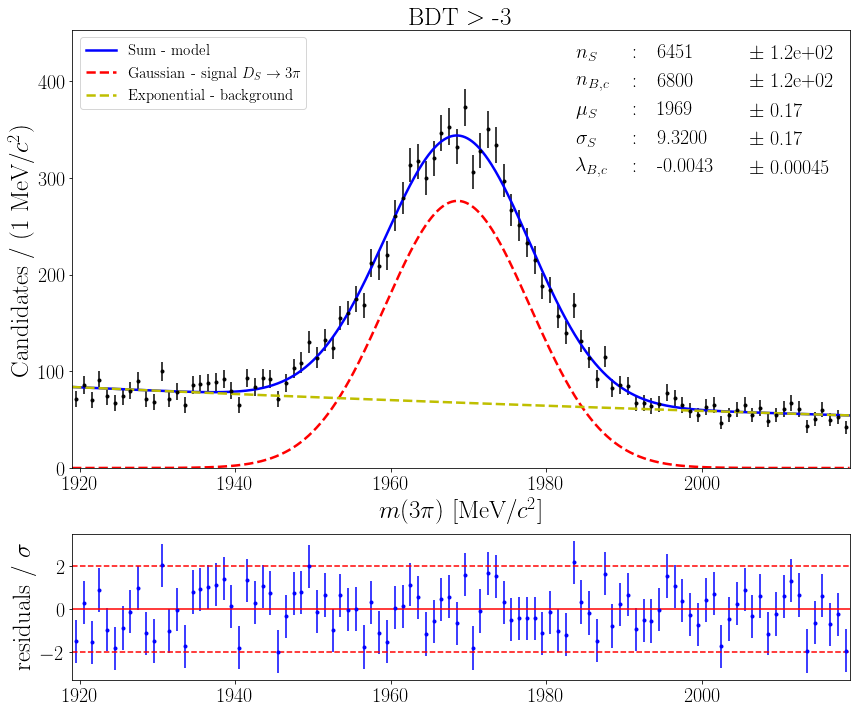

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi_detail/tau_M_common_Dstto3pi_detail_fit_BDT-3
Number of d.o.f. in the model:  5
Reduced chi2:  1.1210599757445465


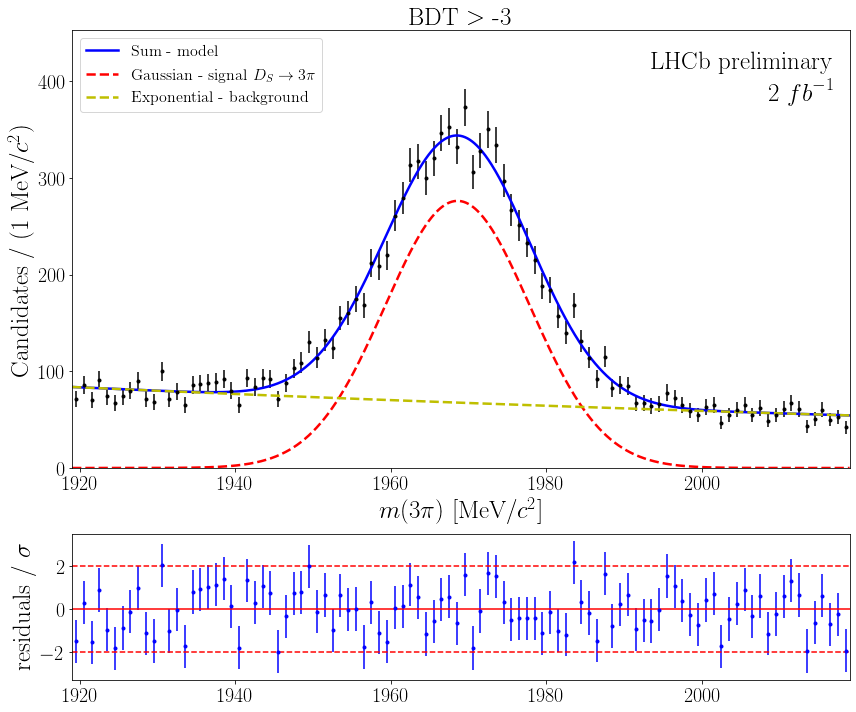

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi/tau_M_common_Dstto3pi_fit_BDT-3
0.04729500359699812
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_Dstto3pi/common_Dstto3pi_BDT-3_params.json
/afs/cern.ch/user/c/correian/bd2dst3pi/output/tables/common_Dstto3pi/common_Dstto3pi_BDT-3_params.tex
\begin{tabular}[t]{lc}
\hline
Variable &Fitted Value\\
\hline\hline
$\lambda_{bkg,c}$&$-0.00432\pm0.00045$\\
\hline
$\mu_{S}$&$1968.57\pm0.17$\\
\hline
$n_{bkg,c}$&$(6.80\pm0.12)\times 10^3$\\
\hline
$n_{S}$&$(6.45\pm0.12)\times 10^3$\\
\hline
$\sigma_{S}$&$9.32\pm0.17$\\
\hline
\end{tabular}


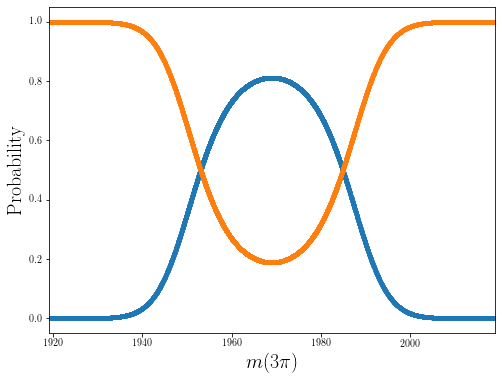

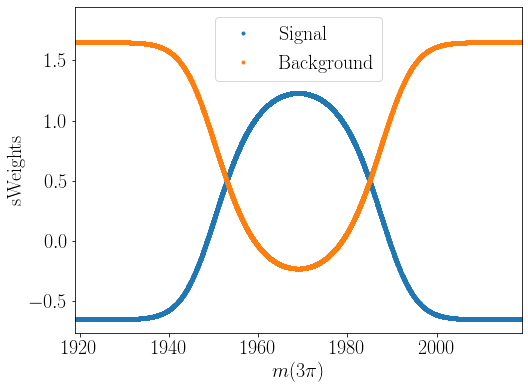

/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-3_sWeights.root
/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-3.root
================================ cut_BDT = -2.5 ================================
cut_BDT_ref = -3
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_M_common_Dstto3pi_BDT-2.5
------------------------------------------------------------------
| FCN = -5.206e+04              |     Ncalls=110 (110 total)     |
| EDM = 3.1e-06 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
--------------------

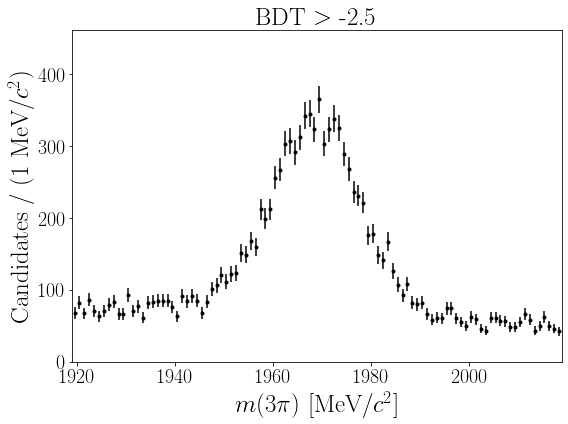

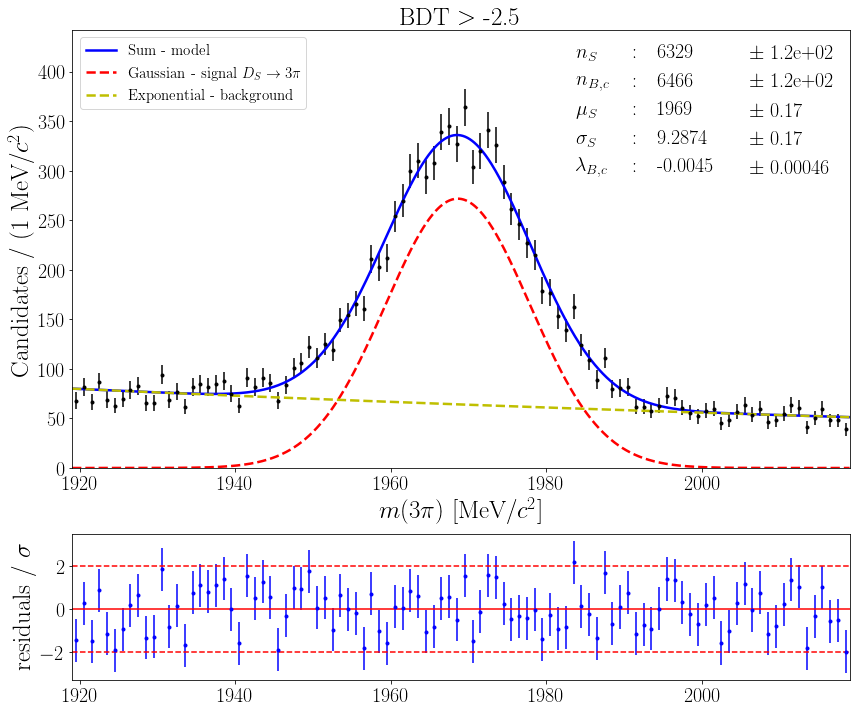

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi_detail/tau_M_common_Dstto3pi_detail_fit_BDT-2.5
Number of d.o.f. in the model:  5
Reduced chi2:  1.1227891780386139


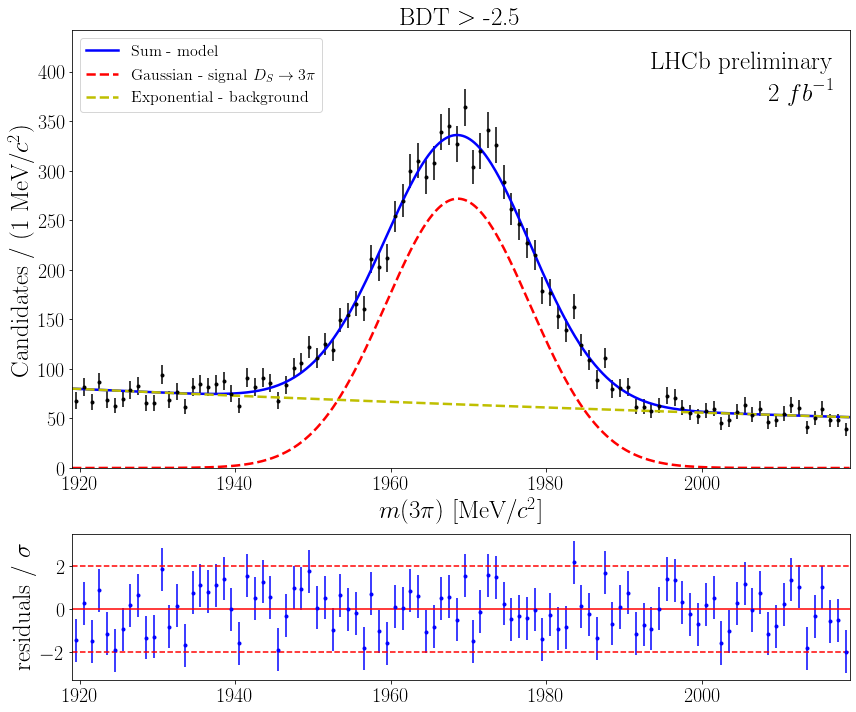

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi/tau_M_common_Dstto3pi_fit_BDT-2.5
0.04645211174775703
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_Dstto3pi/common_Dstto3pi_BDT-2.5_params.json
/afs/cern.ch/user/c/correian/bd2dst3pi/output/tables/common_Dstto3pi/common_Dstto3pi_BDT-2.5_params.tex
\begin{tabular}[t]{lc}
\hline
Variable &Fitted Value\\
\hline\hline
$\lambda_{bkg,c}$&$-0.00445\pm0.00046$\\
\hline
$\mu_{S}$&$1968.60\pm0.17$\\
\hline
$n_{bkg,c}$&$(6.47\pm0.12)\times 10^3$\\
\hline
$n_{S}$&$(6.33\pm0.12)\times 10^3$\\
\hline
$\sigma_{S}$&$9.29\pm0.17$\\
\hline
\end{tabular}


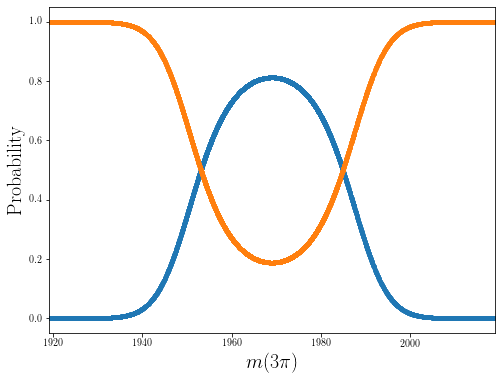

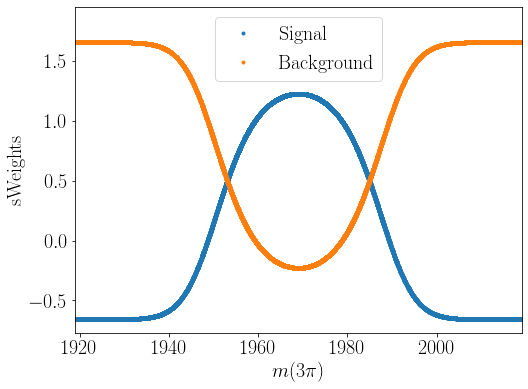

/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-2.5_sWeights.root
/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-2.5.root
================================ cut_BDT = -2 ================================
cut_BDT_ref = -2.5
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_M_common_Dstto3pi_BDT-2
------------------------------------------------------------------
| FCN = -4.947e+04              |      Ncalls=92 (92 total)      |
| EDM = 0.000322 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------

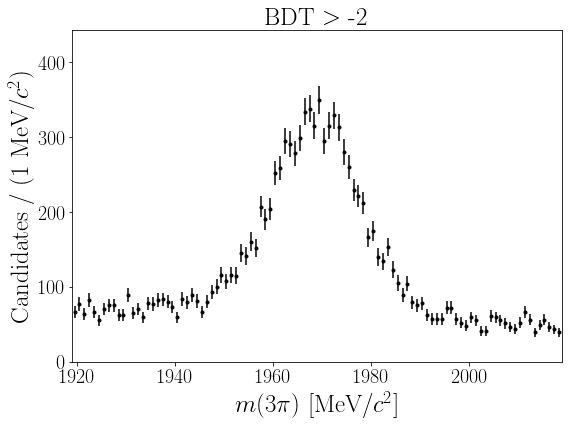

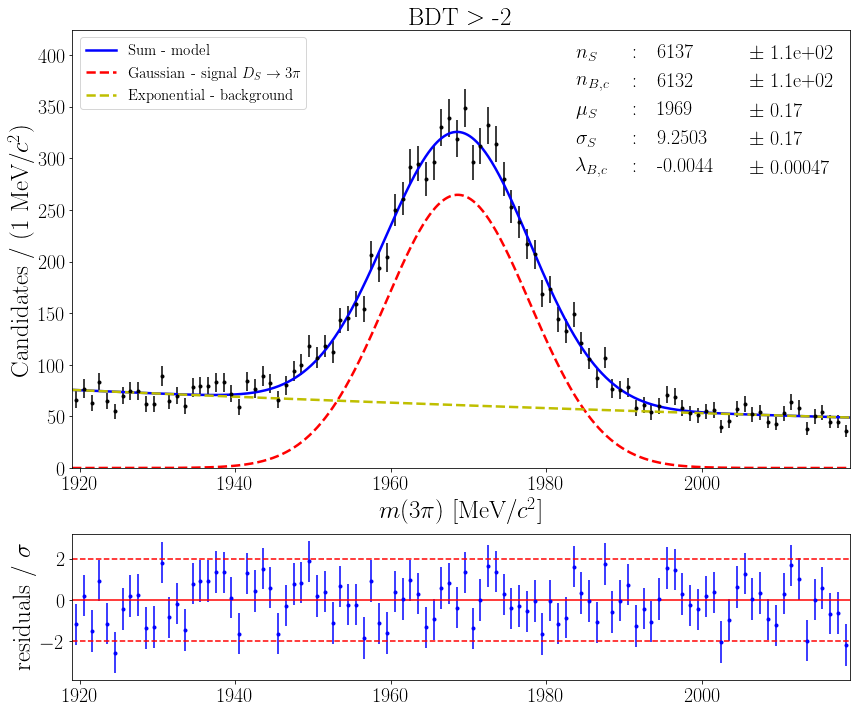

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi_detail/tau_M_common_Dstto3pi_detail_fit_BDT-2
Number of d.o.f. in the model:  5
Reduced chi2:  1.1596402543883515


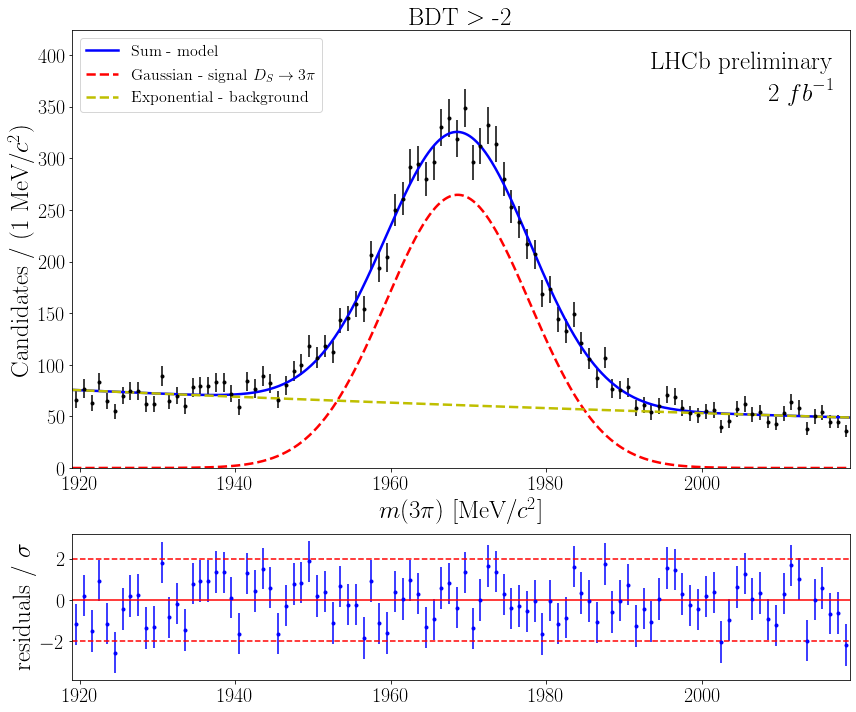

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi/tau_M_common_Dstto3pi_fit_BDT-2
0.04376353552759183
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_Dstto3pi/common_Dstto3pi_BDT-2_params.json
/afs/cern.ch/user/c/correian/bd2dst3pi/output/tables/common_Dstto3pi/common_Dstto3pi_BDT-2_params.tex
\begin{tabular}[t]{lc}
\hline
Variable &Fitted Value\\
\hline\hline
$\lambda_{bkg,c}$&$-0.00437\pm0.00047$\\
\hline
$\mu_{S}$&$1968.59\pm0.17$\\
\hline
$n_{bkg,c}$&$(6.13\pm0.11)\times 10^3$\\
\hline
$n_{S}$&$(6.14\pm0.11)\times 10^3$\\
\hline
$\sigma_{S}$&$9.25\pm0.17$\\
\hline
\end{tabular}


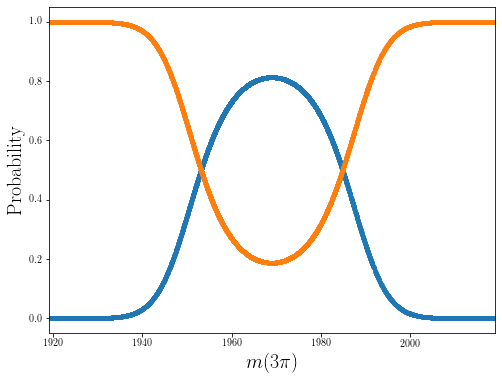

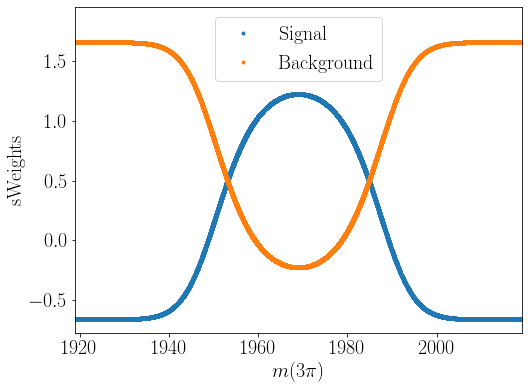

/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-2_sWeights.root
/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-2.root
================================ cut_BDT = -1.5 ================================
cut_BDT_ref = -2
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_M_common_Dstto3pi_BDT-1.5
------------------------------------------------------------------
| FCN = -4.642e+04              |      Ncalls=92 (92 total)      |
| EDM = 0.000132 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
--------------------

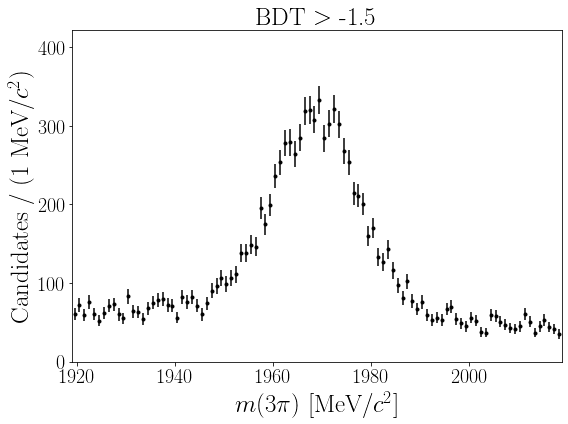

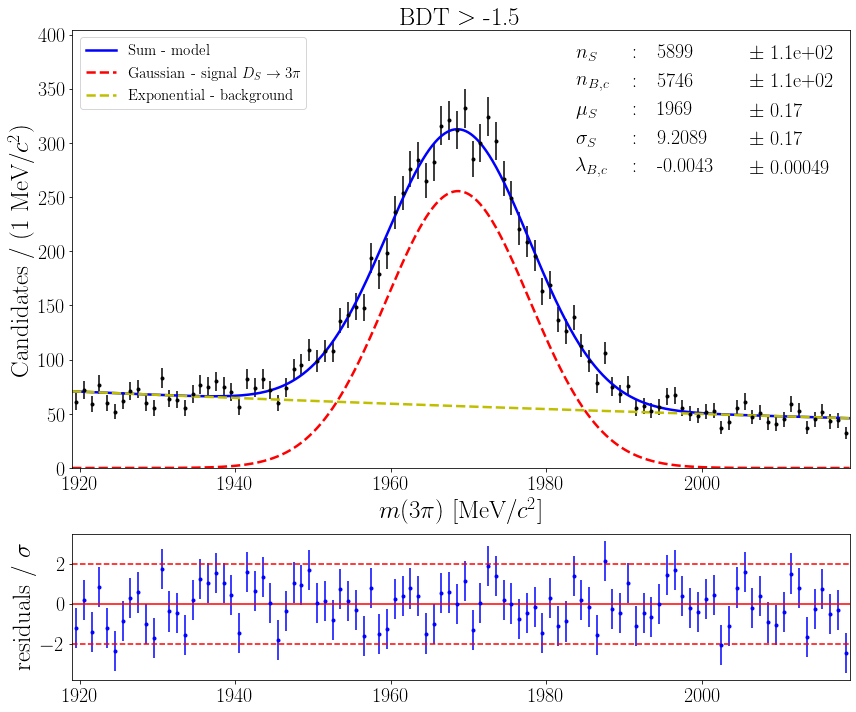

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi_detail/tau_M_common_Dstto3pi_detail_fit_BDT-1.5
Number of d.o.f. in the model:  5
Reduced chi2:  1.1768098183313094


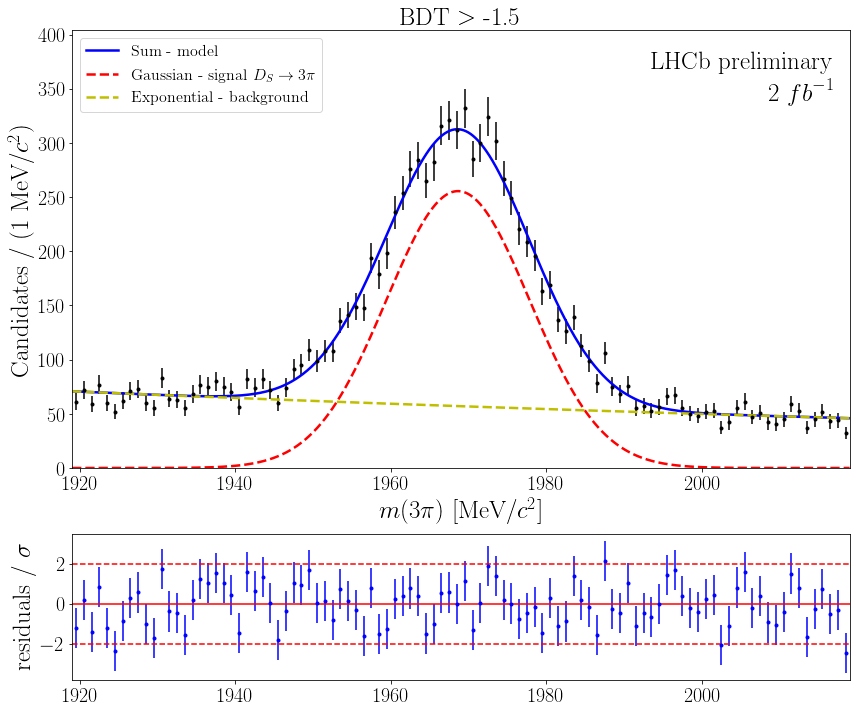

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi/tau_M_common_Dstto3pi_fit_BDT-1.5
0.041499291650417346
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_Dstto3pi/common_Dstto3pi_BDT-1.5_params.json
/afs/cern.ch/user/c/correian/bd2dst3pi/output/tables/common_Dstto3pi/common_Dstto3pi_BDT-1.5_params.tex
\begin{tabular}[t]{lc}
\hline
Variable &Fitted Value\\
\hline\hline
$\lambda_{bkg,c}$&$-0.00432\pm0.00049$\\
\hline
$\mu_{S}$&$1968.63\pm0.17$\\
\hline
$n_{bkg,c}$&$(5.75\pm0.11)\times 10^3$\\
\hline
$n_{S}$&$(5.90\pm0.11)\times 10^3$\\
\hline
$\sigma_{S}$&$9.21\pm0.17$\\
\hline
\end{tabular}


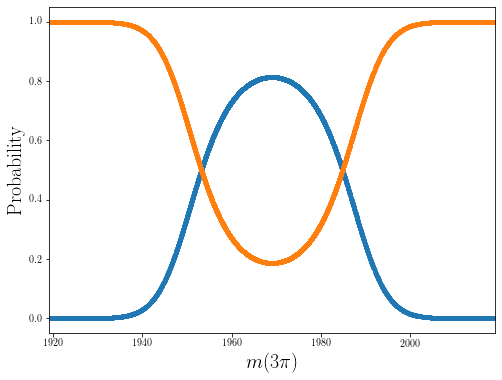

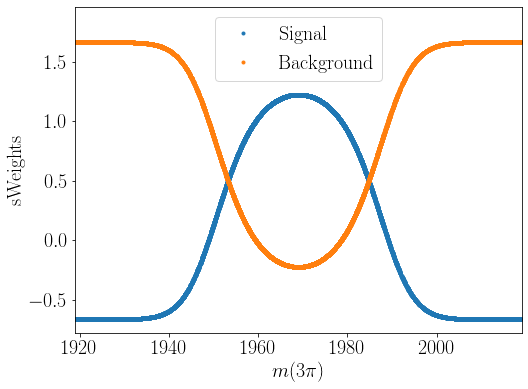

/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-1.5_sWeights.root
/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-1.5.root
================================ cut_BDT = -1 ================================
cut_BDT_ref = -1.5
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_M_common_Dstto3pi_BDT-1
------------------------------------------------------------------
| FCN = -4.26e+04               |     Ncalls=114 (114 total)     |
| EDM = 2.98e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------

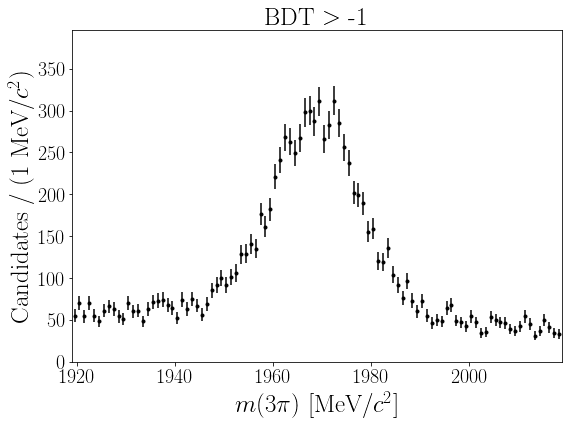

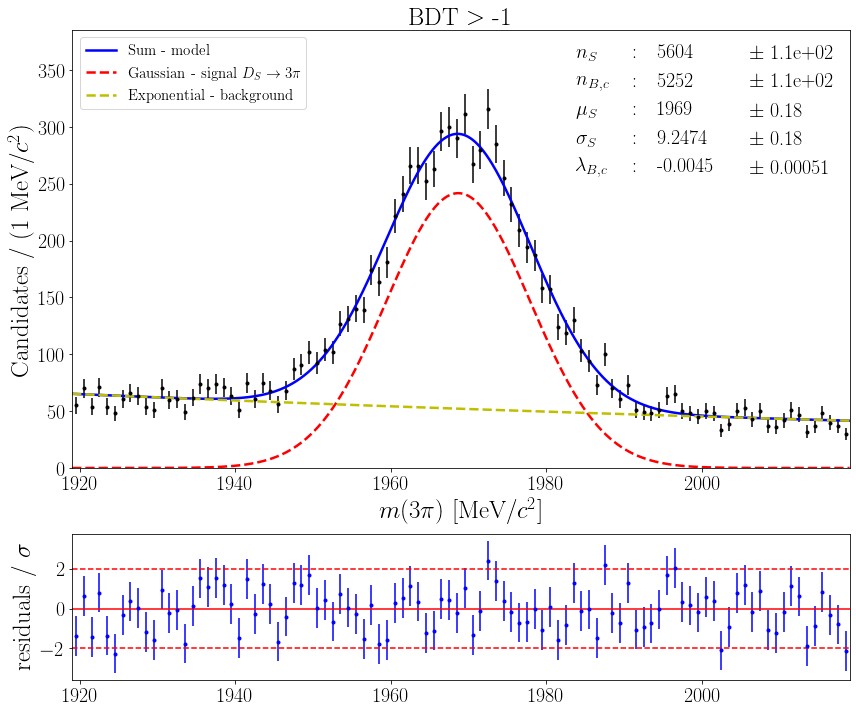

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi_detail/tau_M_common_Dstto3pi_detail_fit_BDT-1
Number of d.o.f. in the model:  5
Reduced chi2:  1.219830576962418


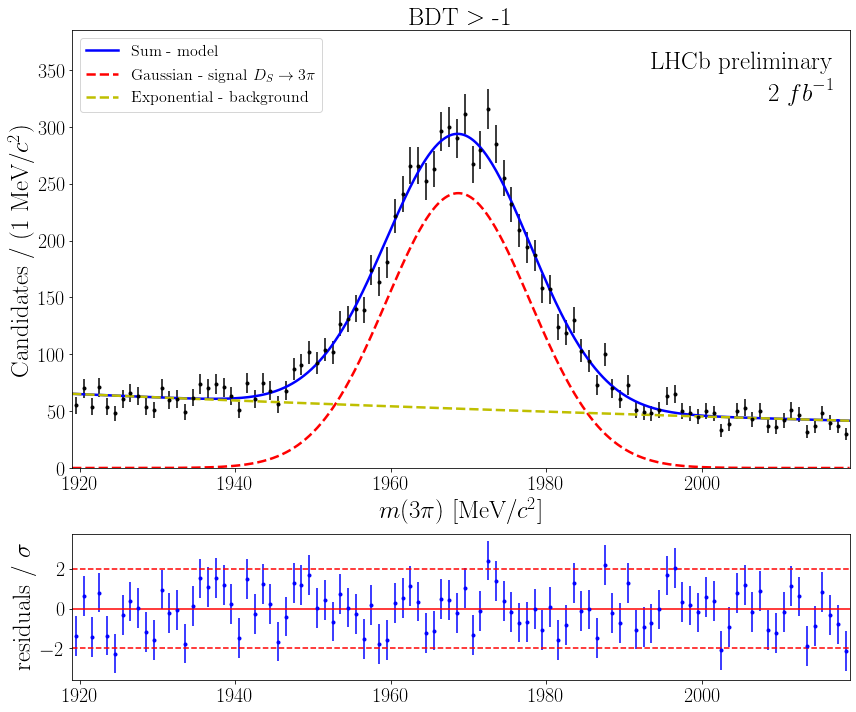

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi/tau_M_common_Dstto3pi_fit_BDT-1
0.04633878052439401
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_Dstto3pi/common_Dstto3pi_BDT-1_params.json
/afs/cern.ch/user/c/correian/bd2dst3pi/output/tables/common_Dstto3pi/common_Dstto3pi_BDT-1_params.tex
\begin{tabular}[t]{lc}
\hline
Variable &Fitted Value\\
\hline\hline
$\lambda_{bkg,c}$&$-0.00451\pm0.00051$\\
\hline
$\mu_{S}$&$1968.66\pm0.18$\\
\hline
$n_{bkg,c}$&$(5.25\pm0.11)\times 10^3$\\
\hline
$n_{S}$&$(5.60\pm0.11)\times 10^3$\\
\hline
$\sigma_{S}$&$9.25\pm0.18$\\
\hline
\end{tabular}


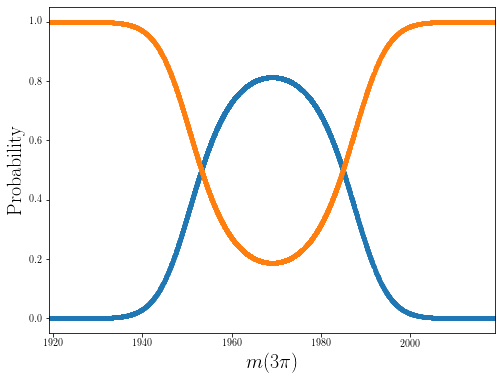

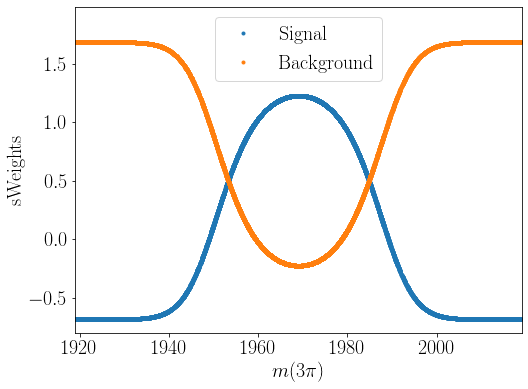

/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-1_sWeights.root
/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-1.root
================================ cut_BDT = -0.5 ================================
cut_BDT_ref = -1
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_M_common_Dstto3pi_BDT-0.5
------------------------------------------------------------------
| FCN = -3.783e+04              |      Ncalls=96 (96 total)      |
| EDM = 0.000949 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
--------------------

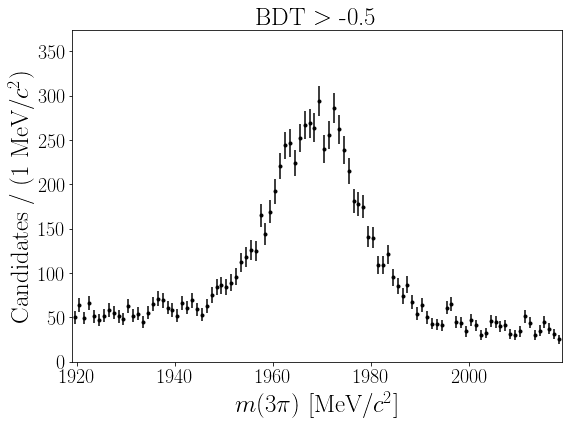

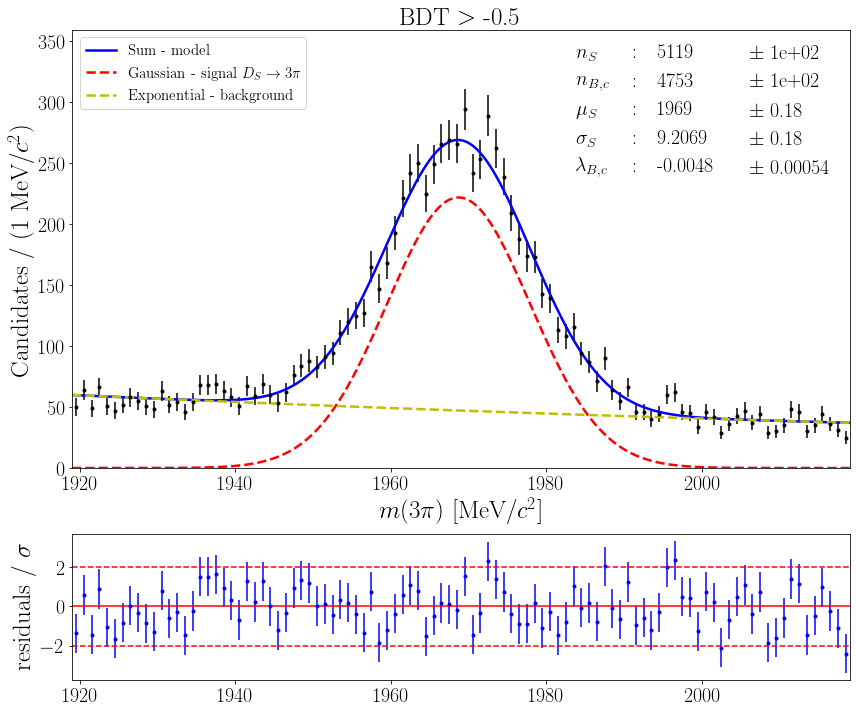

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi_detail/tau_M_common_Dstto3pi_detail_fit_BDT-0.5
Number of d.o.f. in the model:  5
Reduced chi2:  1.197054422993008


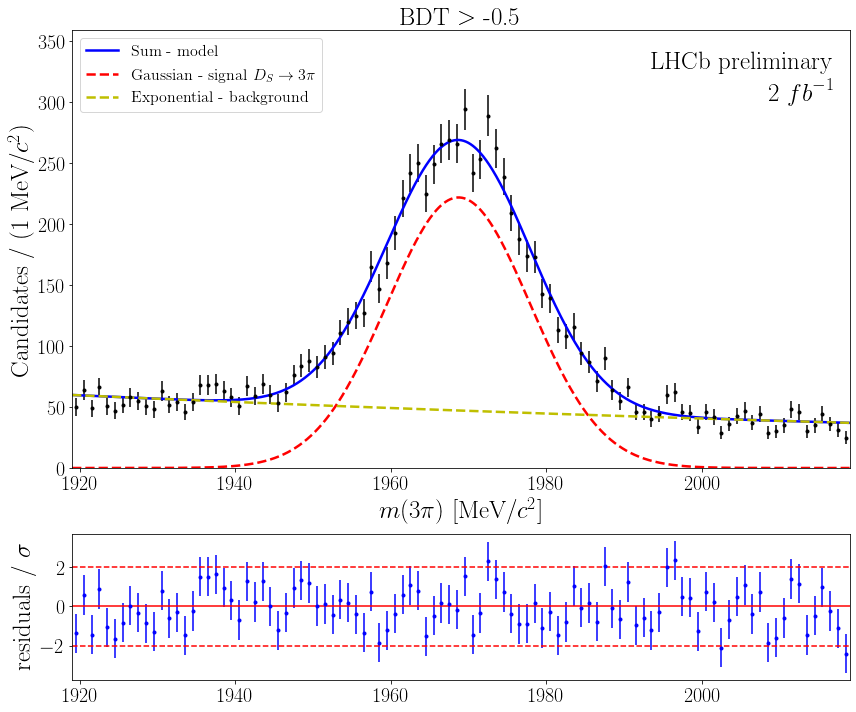

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi/tau_M_common_Dstto3pi_fit_BDT-0.5
0.05165119192565169
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_Dstto3pi/common_Dstto3pi_BDT-0.5_params.json
/afs/cern.ch/user/c/correian/bd2dst3pi/output/tables/common_Dstto3pi/common_Dstto3pi_BDT-0.5_params.tex
\begin{tabular}[t]{lc}
\hline
Variable &Fitted Value\\
\hline\hline
$\lambda_{bkg,c}$&$-0.00481\pm0.00054$\\
\hline
$\mu_{S}$&$1968.71\pm0.18$\\
\hline
$n_{bkg,c}$&$(4.75\pm0.10)\times 10^3$\\
\hline
$n_{S}$&$(5.12\pm0.10)\times 10^3$\\
\hline
$\sigma_{S}$&$9.21\pm0.18$\\
\hline
\end{tabular}


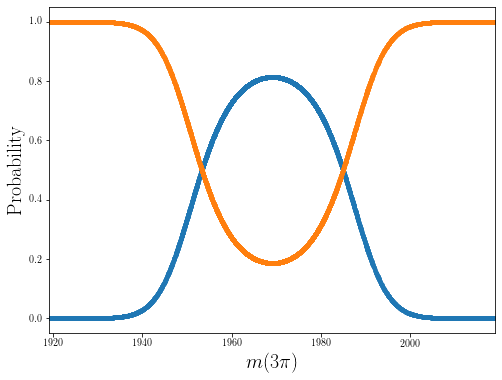

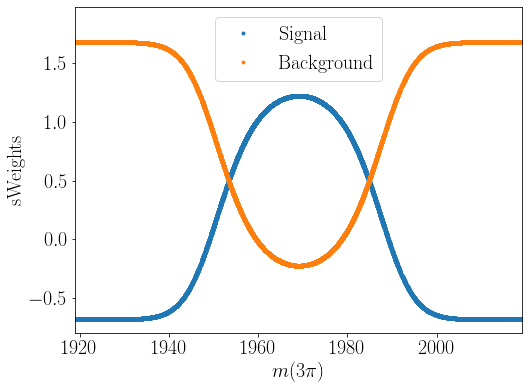

/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-0.5_sWeights.root
/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT-0.5.root
================================ cut_BDT = 0 ================================
cut_BDT_ref = -0.5
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_M_common_Dstto3pi_BDT0
------------------------------------------------------------------
| FCN = -3.258e+04              |      Ncalls=88 (88 total)      |
| EDM = 0.000173 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
--------------------

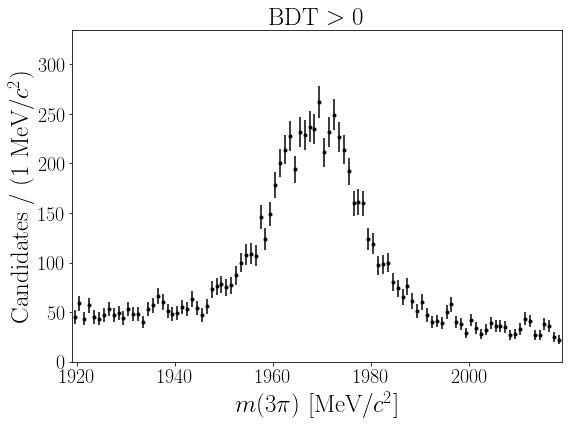

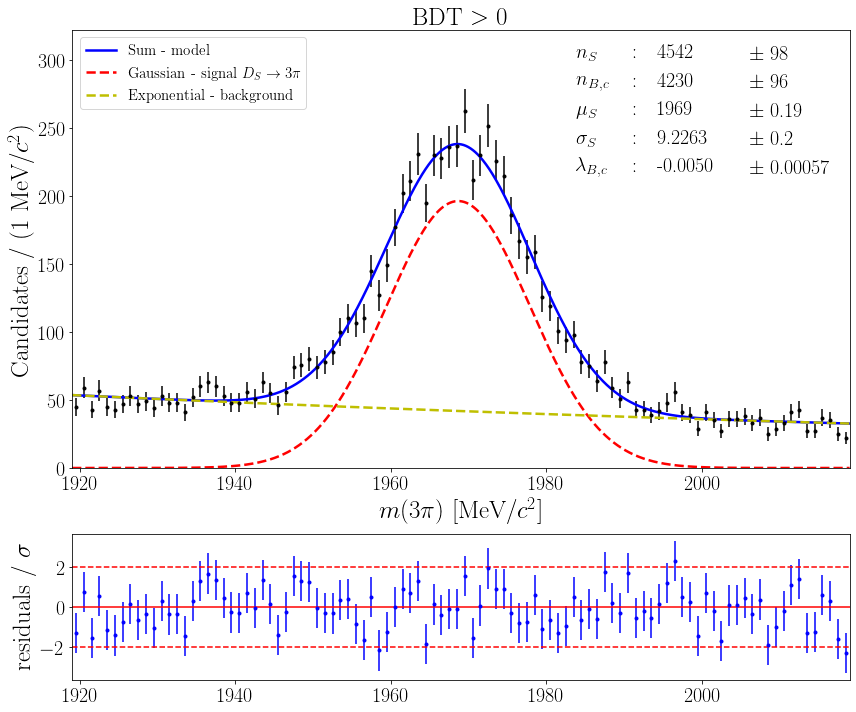

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi_detail/tau_M_common_Dstto3pi_detail_fit_BDT0
Number of d.o.f. in the model:  5
Reduced chi2:  1.0765939764359371


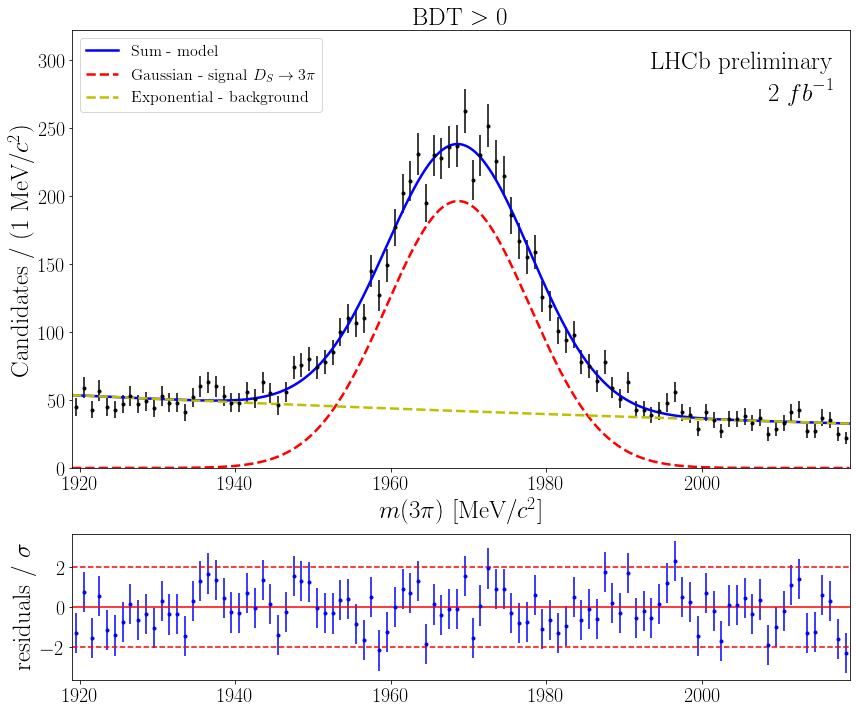

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi/tau_M_common_Dstto3pi_fit_BDT0
0.05812264758031578
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_Dstto3pi/common_Dstto3pi_BDT0_params.json
/afs/cern.ch/user/c/correian/bd2dst3pi/output/tables/common_Dstto3pi/common_Dstto3pi_BDT0_params.tex
\begin{tabular}[t]{lc}
\hline
Variable &Fitted Value\\
\hline\hline
$\lambda_{bkg,c}$&$-0.00495\pm0.00057$\\
\hline
$\mu_{S}$&$1968.66\pm0.19$\\
\hline
$n_{bkg,c}$&$4230\pm96$\\
\hline
$n_{S}$&$4542\pm98$\\
\hline
$\sigma_{S}$&$9.23\pm0.20$\\
\hline
\end{tabular}


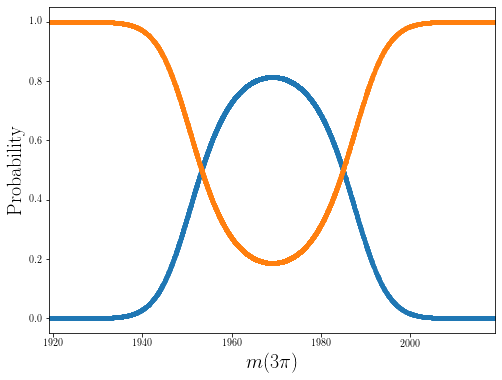

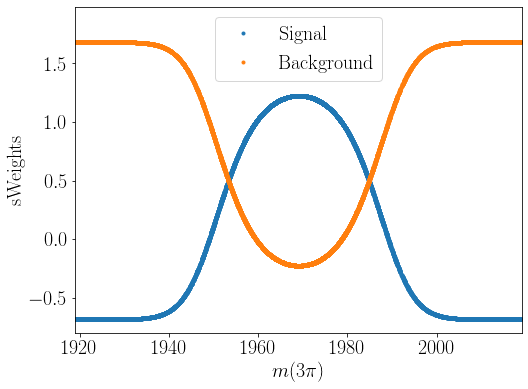

/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT0_sWeights.root
/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT0.root
================================ cut_BDT = 0.5 ================================
cut_BDT_ref = 0
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_M_common_Dstto3pi_BDT0.5
------------------------------------------------------------------
| FCN = -2.637e+04              |      Ncalls=98 (98 total)      |
| EDM = 0.000332 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
-------------------------

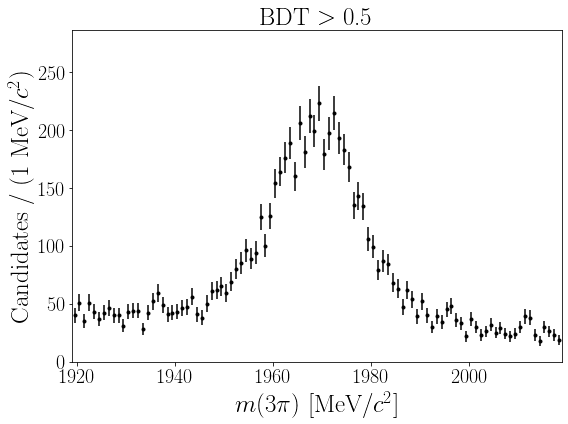

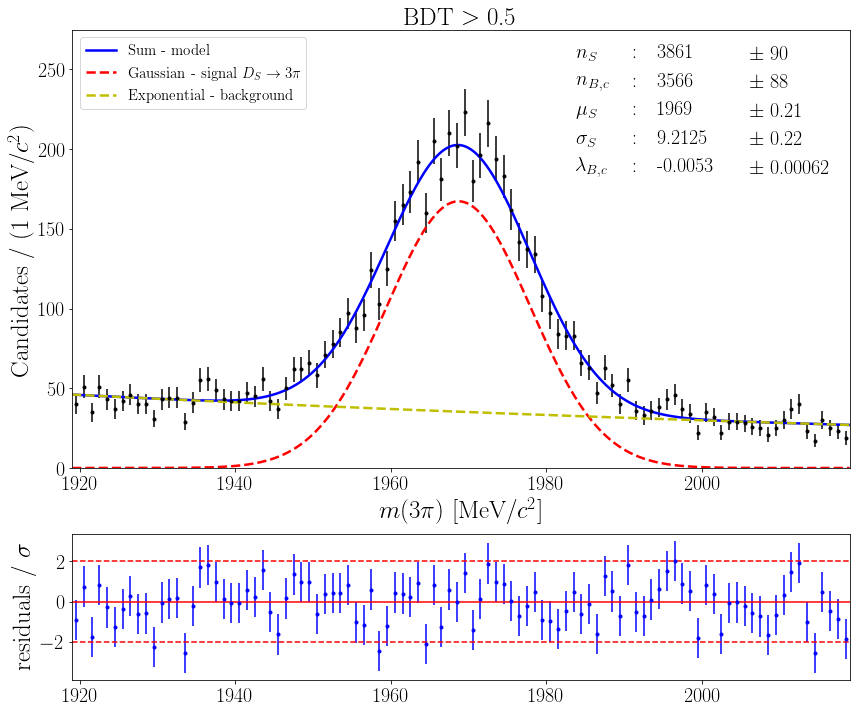

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi_detail/tau_M_common_Dstto3pi_detail_fit_BDT0.5
Number of d.o.f. in the model:  5
Reduced chi2:  1.2335954722287752


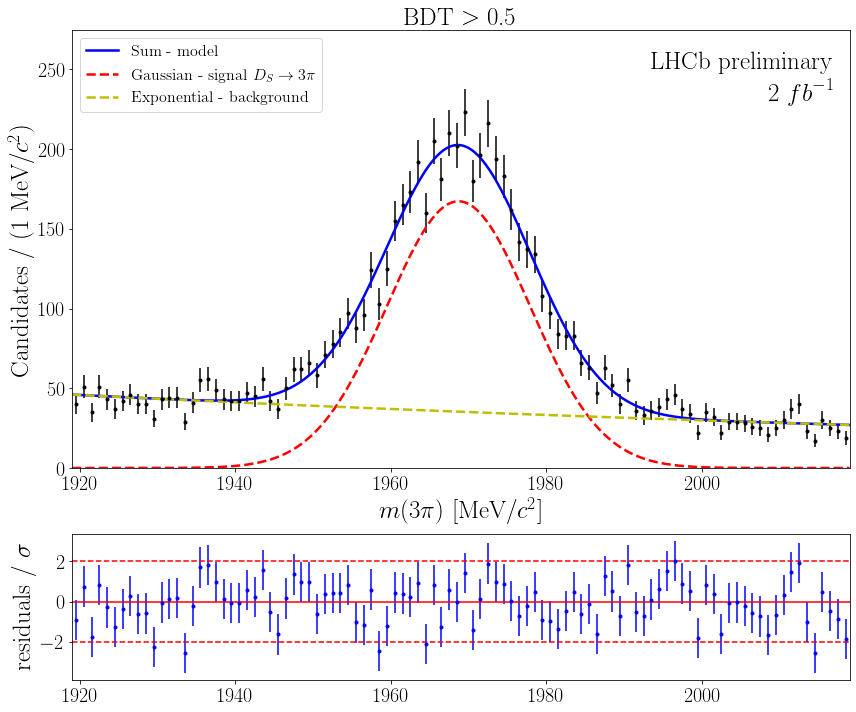

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi/tau_M_common_Dstto3pi_fit_BDT0.5
0.05792067881268161
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_Dstto3pi/common_Dstto3pi_BDT0.5_params.json
/afs/cern.ch/user/c/correian/bd2dst3pi/output/tables/common_Dstto3pi/common_Dstto3pi_BDT0.5_params.tex
\begin{tabular}[t]{lc}
\hline
Variable &Fitted Value\\
\hline\hline
$\lambda_{bkg,c}$&$-0.00534\pm0.00062$\\
\hline
$\mu_{S}$&$1968.70\pm0.21$\\
\hline
$n_{bkg,c}$&$3566\pm88$\\
\hline
$n_{S}$&$3861\pm90$\\
\hline
$\sigma_{S}$&$9.21\pm0.22$\\
\hline
\end{tabular}


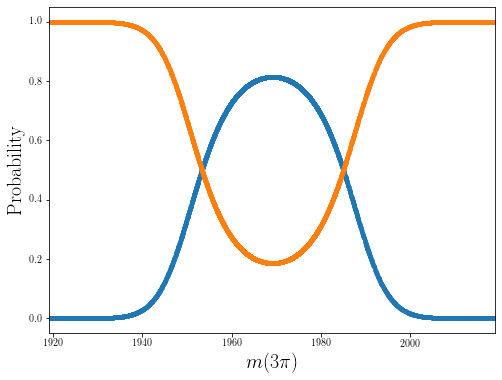

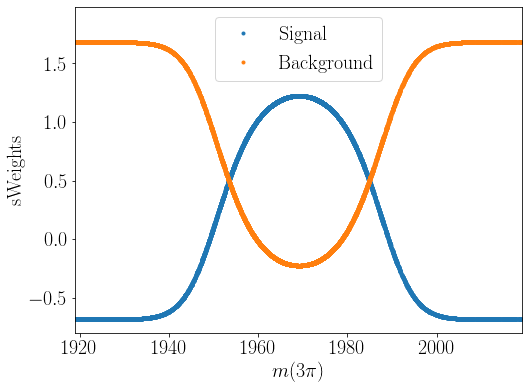

/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT0.5_sWeights.root
/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT0.5.root
================================ cut_BDT = 1 ================================
cut_BDT_ref = 0.5
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_M_common_Dstto3pi_BDT1
------------------------------------------------------------------
| FCN = -1.953e+04              |     Ncalls=116 (116 total)     |
| EDM = 1.08e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
-----------------------

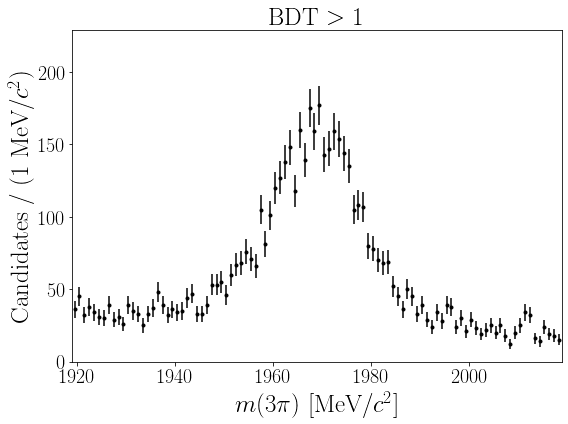

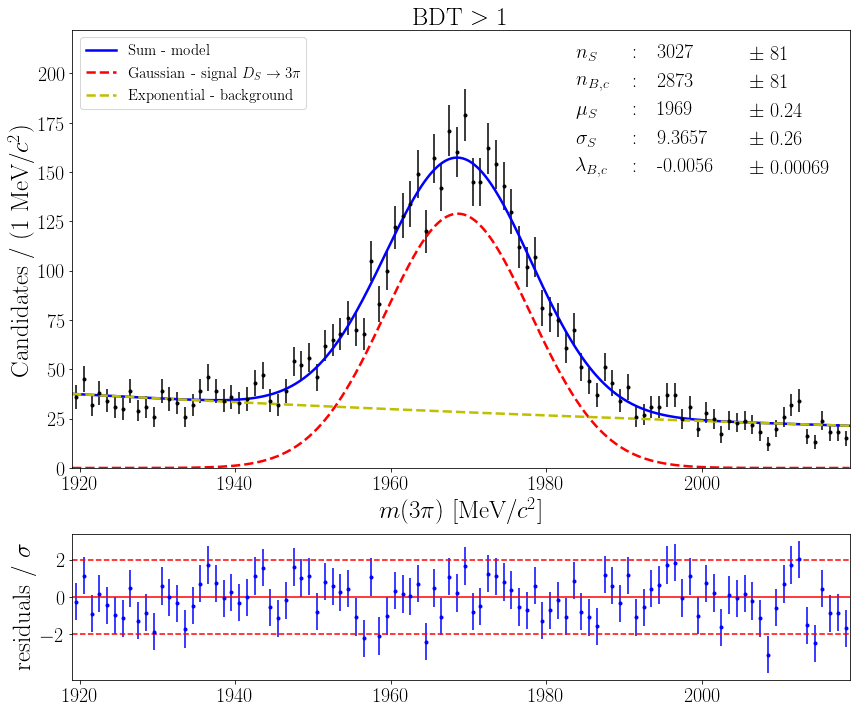

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi_detail/tau_M_common_Dstto3pi_detail_fit_BDT1
Number of d.o.f. in the model:  5
Reduced chi2:  1.237749919507458


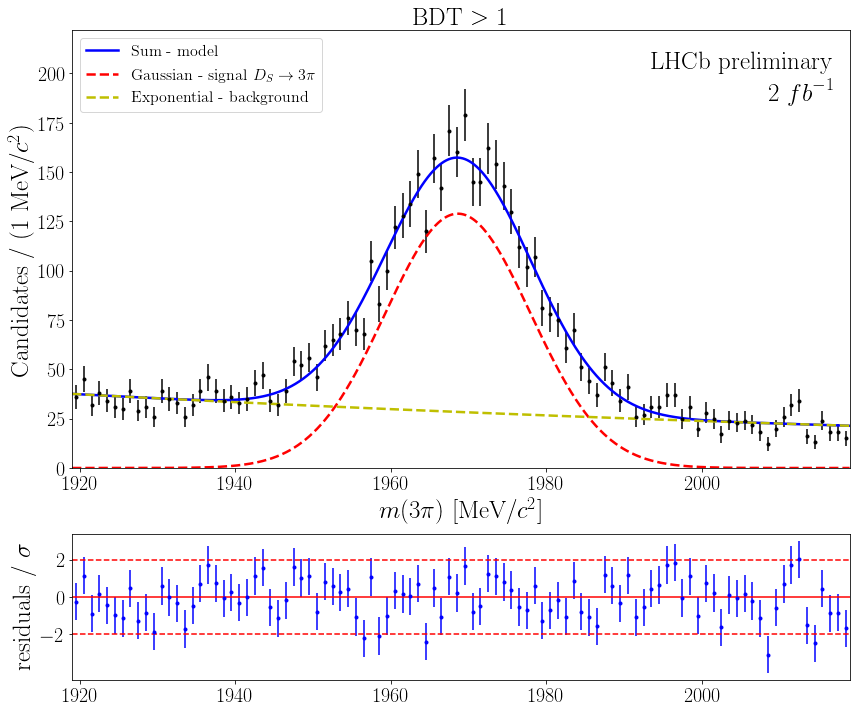

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi/tau_M_common_Dstto3pi_fit_BDT1
0.05577486978879109
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_Dstto3pi/common_Dstto3pi_BDT1_params.json
/afs/cern.ch/user/c/correian/bd2dst3pi/output/tables/common_Dstto3pi/common_Dstto3pi_BDT1_params.tex
\begin{tabular}[t]{lc}
\hline
Variable &Fitted Value\\
\hline\hline
$\lambda_{bkg,c}$&$-0.00563\pm0.00069$\\
\hline
$\mu_{S}$&$1968.62\pm0.24$\\
\hline
$n_{bkg,c}$&$2873\pm81$\\
\hline
$n_{S}$&$3027\pm81$\\
\hline
$\sigma_{S}$&$9.37\pm0.26$\\
\hline
\end{tabular}


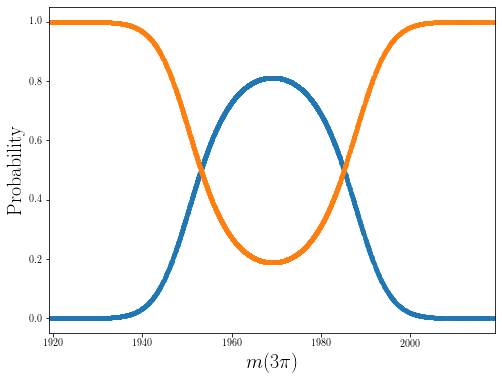

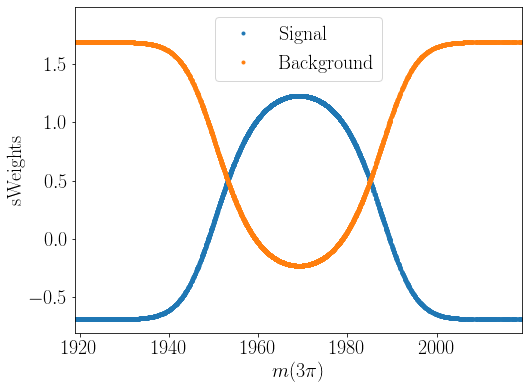

/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT1_sWeights.root
/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT1.root
================================ cut_BDT = 1.5 ================================
cut_BDT_ref = 1
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_M_common_Dstto3pi_BDT1.5
------------------------------------------------------------------
| FCN = -1.265e+04              |     Ncalls=118 (118 total)     |
| EDM = 0.000214 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
-------------------------

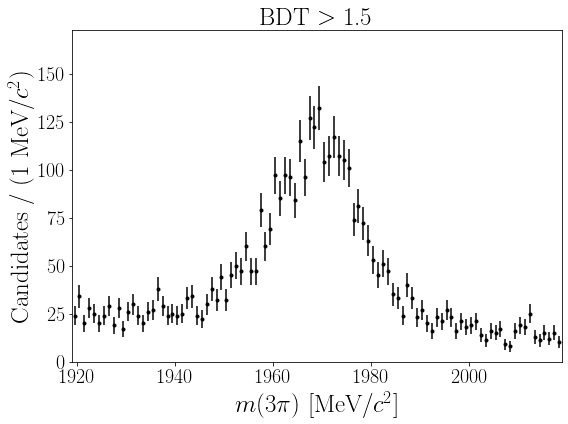

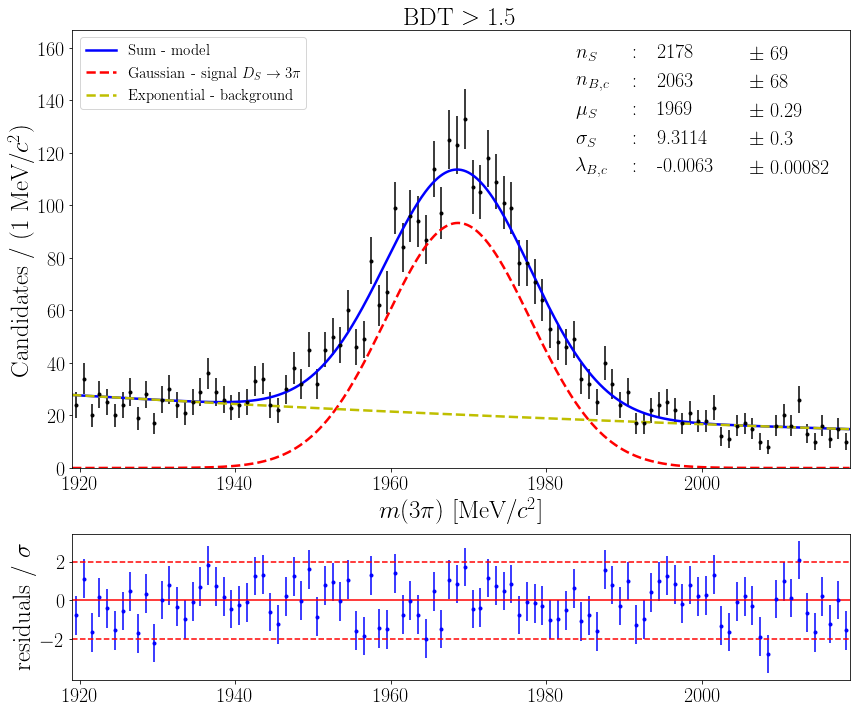

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi_detail/tau_M_common_Dstto3pi_detail_fit_BDT1.5
Number of d.o.f. in the model:  5
Reduced chi2:  1.174961773787939


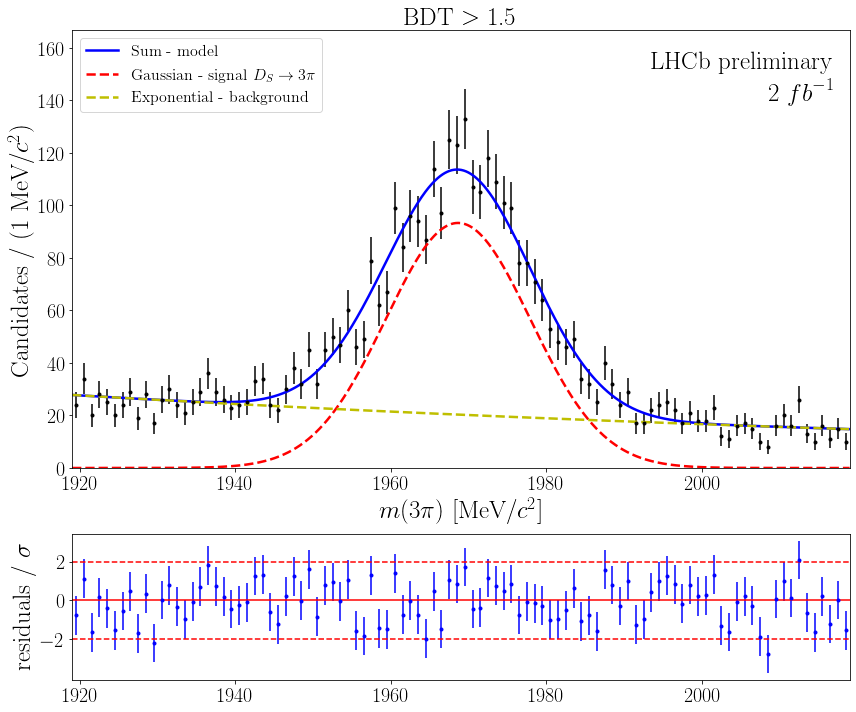

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dstto3pi/tau_M_common_Dstto3pi_fit_BDT1.5
0.07025820364762538
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_Dstto3pi/common_Dstto3pi_BDT1.5_params.json
/afs/cern.ch/user/c/correian/bd2dst3pi/output/tables/common_Dstto3pi/common_Dstto3pi_BDT1.5_params.tex
\begin{tabular}[t]{lc}
\hline
Variable &Fitted Value\\
\hline\hline
$\lambda_{bkg,c}$&$-0.00631\pm0.00082$\\
\hline
$\mu_{S}$&$1968.64\pm0.29$\\
\hline
$n_{bkg,c}$&$2063\pm68$\\
\hline
$n_{S}$&$2178\pm69$\\
\hline
$\sigma_{S}$&$9.31\pm0.30$\\
\hline
\end{tabular}


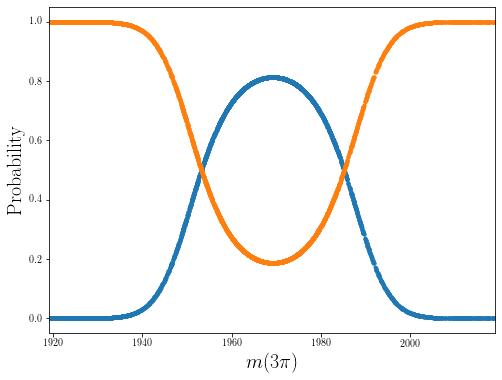

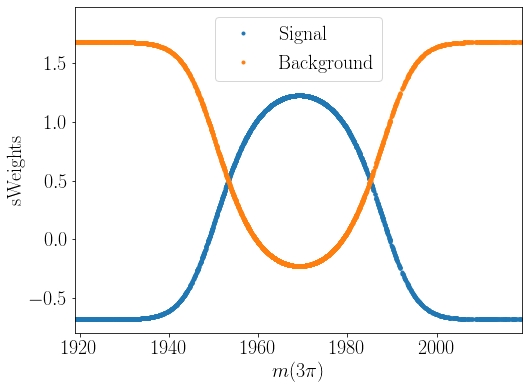

/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT1.5_sWeights.root
/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/common_Dstto3pi/common_Dstto3pi_BDT1.5.root


In [12]:
for cut_BDT, cut_BDT_ref in zip(l_BDT, l_BDT_ref):
    ## CUT ON BDT -------------------------------------------------------
    k = str(cut_BDT)
    df_Ds = df_Ds.query(f"BDT > {cut_BDT}")
    
    print(f"================================ cut_BDT = {k} ================================")
    print(f"cut_BDT_ref = {cut_BDT_ref}")
    
    ## REFERENCE BDT CUT ------------------------------------------------
    if cut_BDT_ref is None:
        params_r = retrieve_params(name_data, name_folder=name_data)
    else:
        name_data_BDT_ref = f"{name_data}_BDT{cut_BDT_ref}"
        params_r = retrieve_params(name_data_BDT_ref, name_folder=name_data)
        params_r = format_previous_params(params_r)
    
    ### HISTOGRAM --------------------------------------------------------
    h.plot_hist_particle({name_data:df_Ds},'tau_M', cut_BDT=cut_BDT,
              n_bins = 100, mode_hist = False, colors='black')
    
    ### FITTING ----------------------------------------------------------
    ## Starting point ........................
    n_events_tau_M = len(df_Ds)
    initial_values_tau = {
        'mu_tau': {
            'value' : params_r['mu_tau'],
            'low': 1965.,
            'high': 1975.,     
        },
        'sigma_tau': {
            'value' : params_r['sigma_tau'],
            'low': 5.,
            'high': 15.,
        },
        'n_bkg_tau': {
            'value' : params_r['n_bkg_tau'],
            'low': 0,
            'high': n_events_tau_M,  
        },
        'n_sig_tau': {
            'value' : params_r['n_sig_tau'],
            'low': 0,
            'high': n_events_tau_M,  
        },
        'lambda_tau': {
            'value' : params_r['lambda_tau'],
            'low': -0.01,
            'high': -0.000001  
        }
    }
    
    ## Parameters .............................
    obs_tau = zfit.Space("x", limits=(low_tau_M, high_tau_M))
    zparams_tau = define_zparams(initial_values_tau, cut_BDT=cut_BDT)

    ## Name of the variables ..................
    name_params_tau_BDT = {
        # Signal
        f'mu_tau|BDT{cut_BDT}'     :'$\mu_{S}$',
        f'sigma_tau|BDT{cut_BDT}'  :'$\sigma_{S}$',
        f'n_sig_tau|BDT{cut_BDT}'  :'$n_{S}$',
        # Combinatorial background
        f'n_bkg_tau|BDT{cut_BDT}'  :'$n_{B,c}$',
        f'lambda_tau|BDT{cut_BDT}' :'$\\lambda_{B,c}$',
    }
    
    ## PDFs ...................................
    gaussian_tau = zfit.pdf.Gauss(zparams_tau["mu_tau"],zparams_tau["sigma_tau"],obs=obs_tau)
    exponential_tau = zfit.pdf.Exponential(zparams_tau["lambda_tau"], obs=obs_tau)

    gaussian_ext_tau = gaussian_tau.create_extended(zparams_tau["n_sig_tau"])
    exp_ext_tau = exponential_tau.create_extended(zparams_tau["n_bkg_tau"])
    model_tau = zfit.pdf.SumPDF([gaussian_ext_tau, exp_ext_tau]) # gauss is folded by frac

    data_tau = zfit.Data.from_pandas(df_Ds['tau_M'],obs=obs_tau)
    
    ## Launch the fit .........................
    start = timeit.default_timer()
    result_tau, params_tau = launch_fit(model_tau, data_tau, extended=True)
    result_tau, params_tau = launch_fit(model_tau, data_tau, extended=True)
    stop = timeit.default_timer()
    print('Time to do the fit: ', stop - start) 
    
    ## Result of the fit ......................
    plot_hist_fit_particle(df_Ds,'tau_M', models = [model_tau,gaussian_ext_tau,exp_ext_tau], 
                           name_models = ["", '$D_S \\to 3\pi$',''], colors = ['b','r','y'],
                           obs=obs_tau, n_bins = 100,mode_hist = False, name_data=name_data+'_detail', 
                          params=params_tau,name_params=name_params_tau_BDT, fontsize_leg=15.,
                          cut_BDT=cut_BDT)
    plot_hist_fit_particle(df_Ds,'tau_M', models = [model_tau,gaussian_ext_tau,exp_ext_tau], 
                           name_models = ["", '$D_S \\to 3\pi$',''], colors = ['b','r','y'],
                           obs=obs_tau, n_bins = 100,mode_hist = False, name_data=name_data, 
                           fontsize_leg=16., pos_text_LHC='right',
                          cut_BDT=cut_BDT)
    ## Correlation ...........................
    corr_B0_M_tau_M = pearsonr(df_Ds['tau_M'], df_Ds['B0_M'])[0]
    print(corr_B0_M_tau_M)
    
    ## Save the result .......................
    name_data_BDT = name_data + f'_BDT{cut_BDT}'
    save_params(params_tau, name_data_BDT, True, {'corr_B0_M_tau_M': corr_B0_M_tau_M}, name_folder=name_data)
    json_to_latex_table(name_data_BDT, name_data, name_params_tau)
    ### SWEIGHTS -------------------------------------------------------------------
    ## Computation ...........................
    
    # Probability that the candidate is actually a Ds particle.
    mass = df_Ds['tau_M']
    probs = pd.DataFrame(dict(sig=gaussian_ext_tau.pdf(mass), bkg=exp_ext_tau.pdf(mass)))
    probs = probs.div(probs.sum(axis=1), axis=0) # normalisation
    # sWeights
    sWeights = splot.compute_sweights(probs)
    
    ## Analysis of the sWeights .............
    fig, ax = plt.subplots(figsize=(8,6))

    ax.plot(mass, probs.sig,'.', label='Signal')
    ax.plot(mass, probs.bkg,'.', label='Background')

    plt.xlim(low_tau_M, high_tau_M) 
    plt.xlabel('$m(3\pi)$',fontsize=20)
    plt.ylabel('Probability',fontsize=20)
    
    plt.show()
    plt.close()
    
    fig, ax = plt.subplots(figsize=(8,6))

    ax.plot(mass, sWeights.sig,'.', label='Signal')
    ax.plot(mass, sWeights.bkg,'.', label='Background')

    plt.xlim(low_tau_M, high_tau_M) 
    fix_plot(ax, ymax=None)

    plt.xlabel('$m(3\pi)$',fontsize=20)
    plt.ylabel('sWeights',fontsize=20)

    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin, ymax*1.1)

    plt.show()
    plt.close()
    
    ### Save the result ----------------------------------------------------------------
    save_dataframe(sWeights, name_data_BDT+'_sWeights', 'sWeights', name_folder=name_data)
    df_Ds['sWeight'] = sWeights.sig.to_numpy()
    save_dataframe(df_Ds, name_data_BDT, 'DecayTree', name_folder=name_data)